In [1]:
import os
import numpy as np
import pandas as pd
import itertools
import networkx as nx
import copy
import math

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

from aux import *
from visualize import *
from model import *

In [2]:
DATA_PATH = '../Data/'
class_ids = sorted([int(file_name.split('_')[0]) for file_name in os.listdir(DATA_PATH) if file_name.endswith('sex.csv')])

# networks and affective matrices of all classes in wave 1
networks = {}
affective_matrices = {}
for class_id in class_ids:
    networks[class_id] = LoadData2Network(class_id, 1)
    affective_matrices[class_id] = pd.read_csv(DATA_PATH + str(class_id) + '_affective_w1.csv', \
                                               header = 0, index_col = 0)
    

In [3]:
# Game Structure
PAYOFF_FUNCTION = {('tell a secret', 'tell a secret'): (1, 1),
                   ('tell a secret', 'refrain'): (-1, 0),
                   ('refrain', 'tell a secret'): (0, -1),
                   ('refrain', 'refrain'): (0, 0)}

In [ ]:
### Simulation by using logistic regression

In [4]:
# Set parameters
NUM_STEP = 6
bonus_for_friends = 0.6395
mode = 'logistic regression'

In [5]:
# Prepare for simulation
simulated_networks = {}

for class_id in class_ids:
    trust_network = networks[class_id]
    affective_matrix = affective_matrices[class_id]
    model = TrustModel(trust_network, affective_matrix, mode, bonus_m2m = 0, bonus_f2f = 0, bonus_for_friends = 0)
    simulated_networks[class_id] = model.run(NUM_STEP)

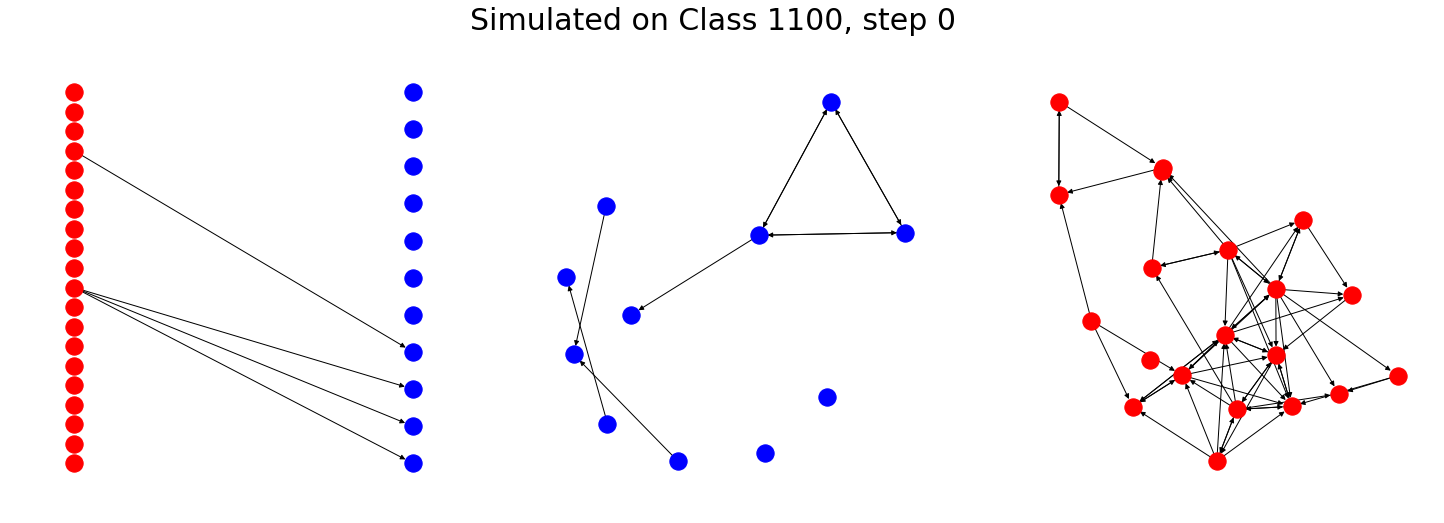

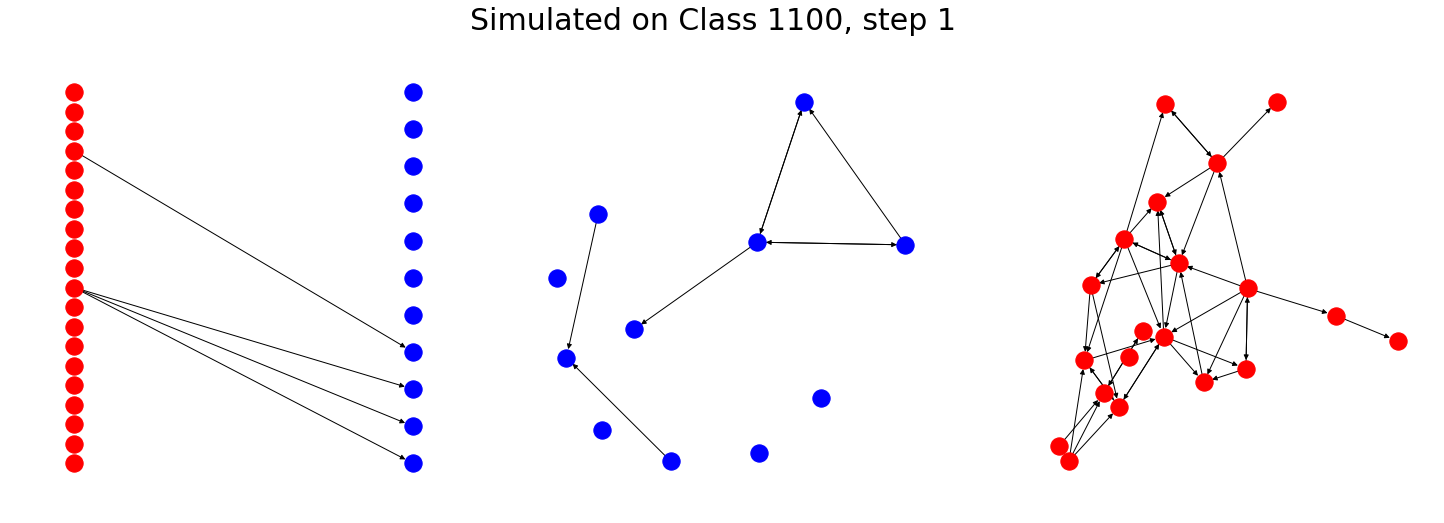

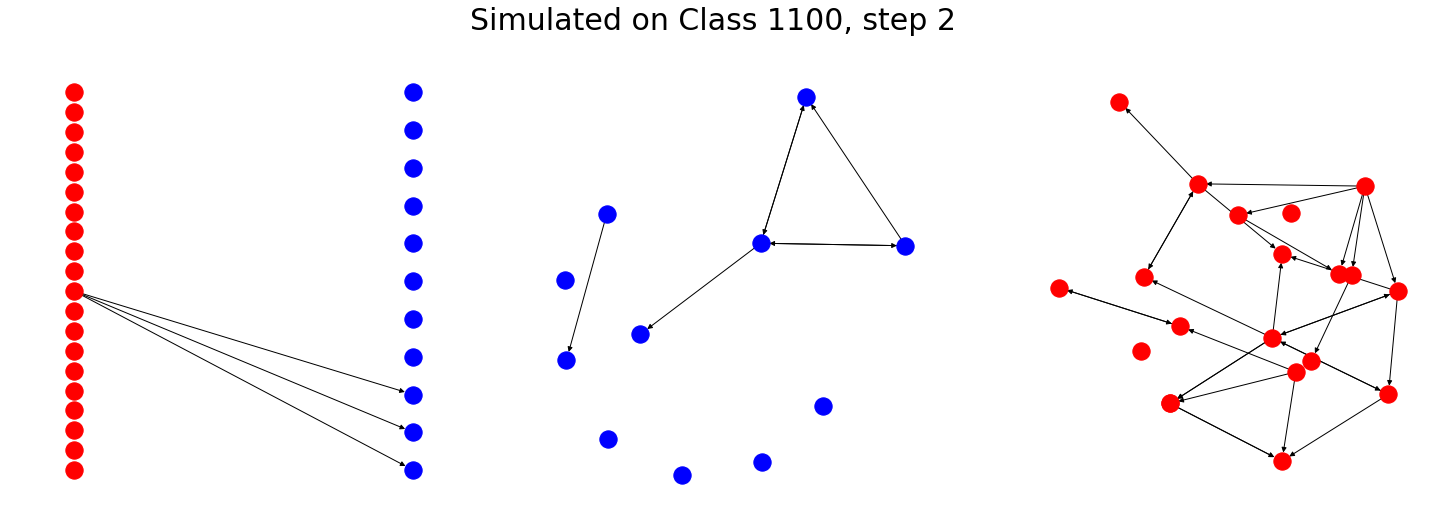

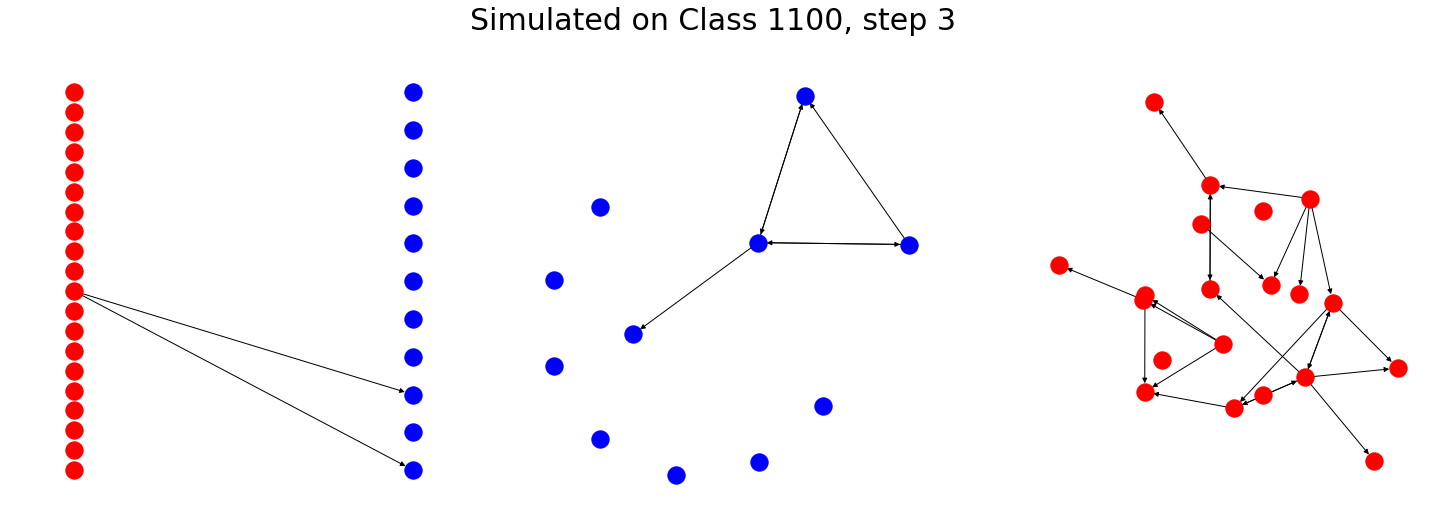

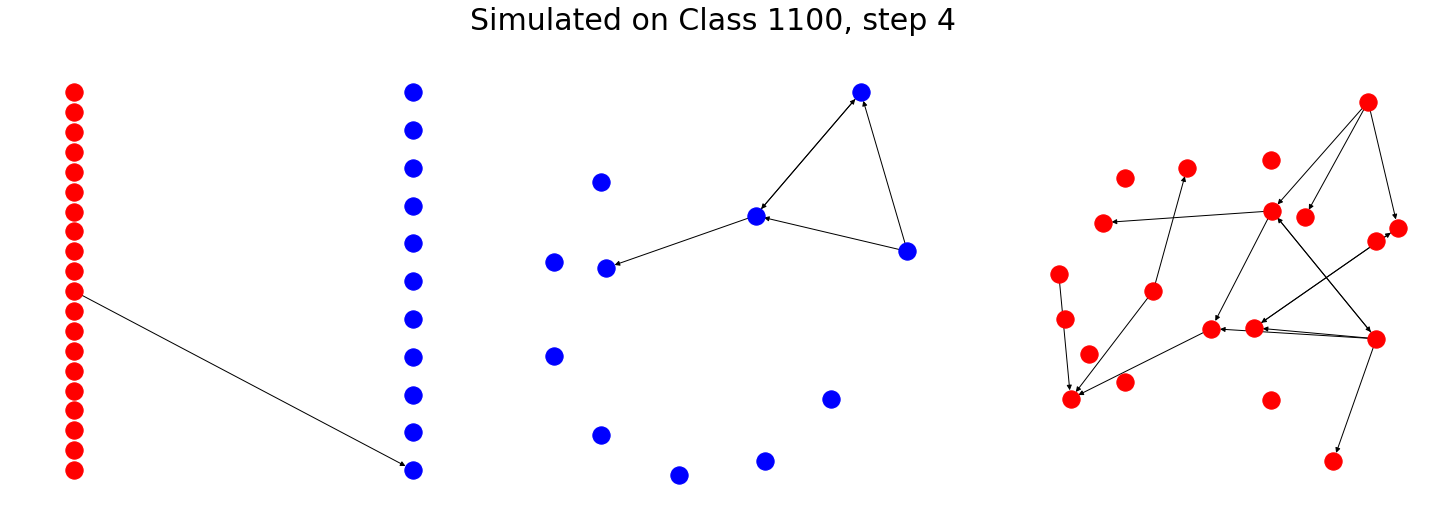

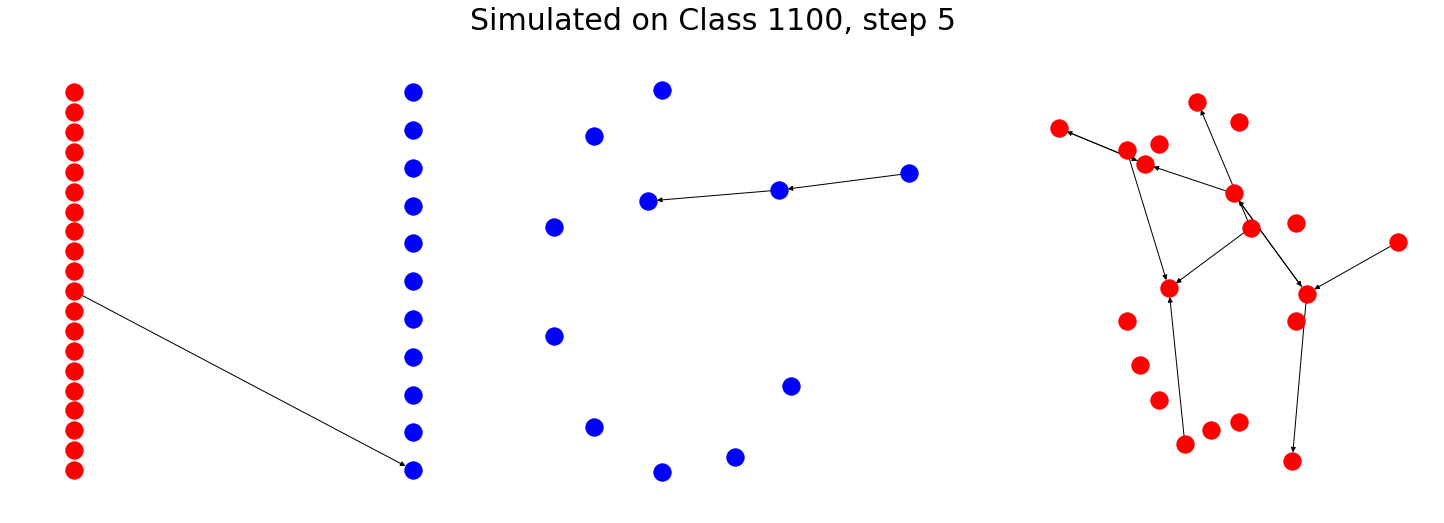

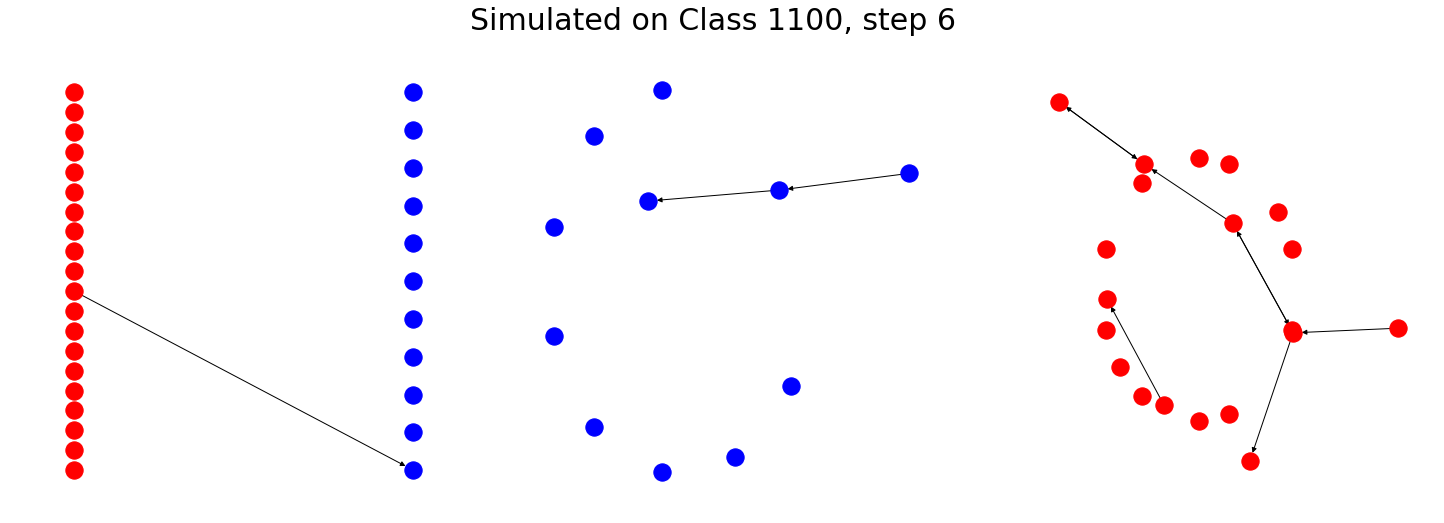

In [6]:
# Visualize a class in all steps
SELECTED_CLASS = 1100
for step in range(NUM_STEP + 1):
    visualize(simulated_networks[1100][step], SELECTED_CLASS, step)

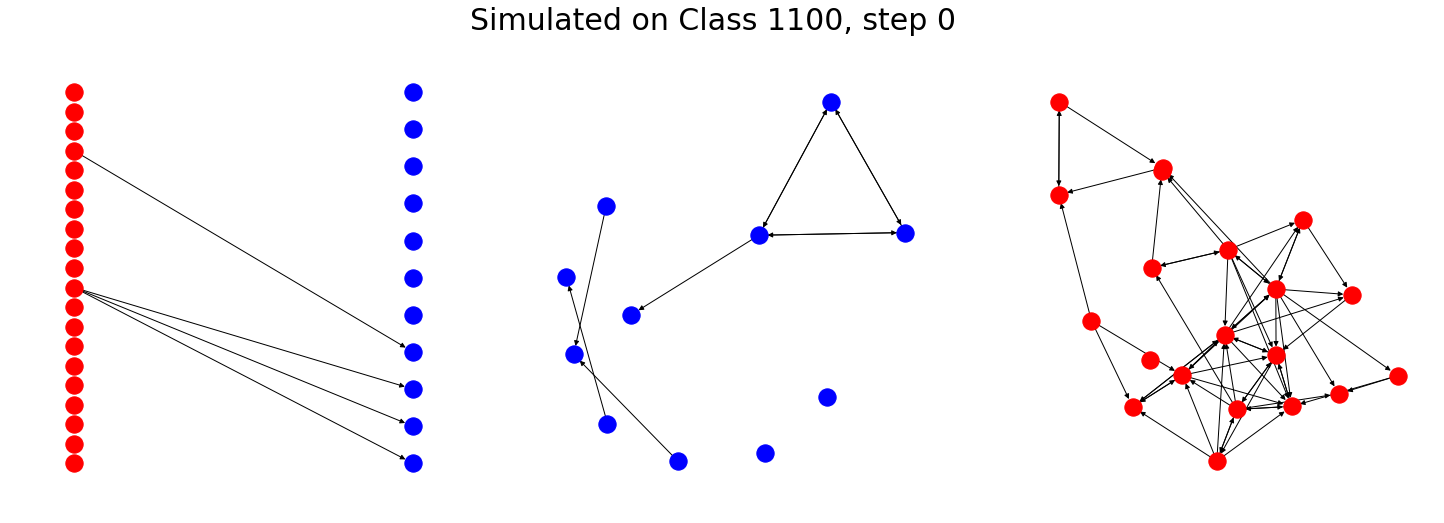

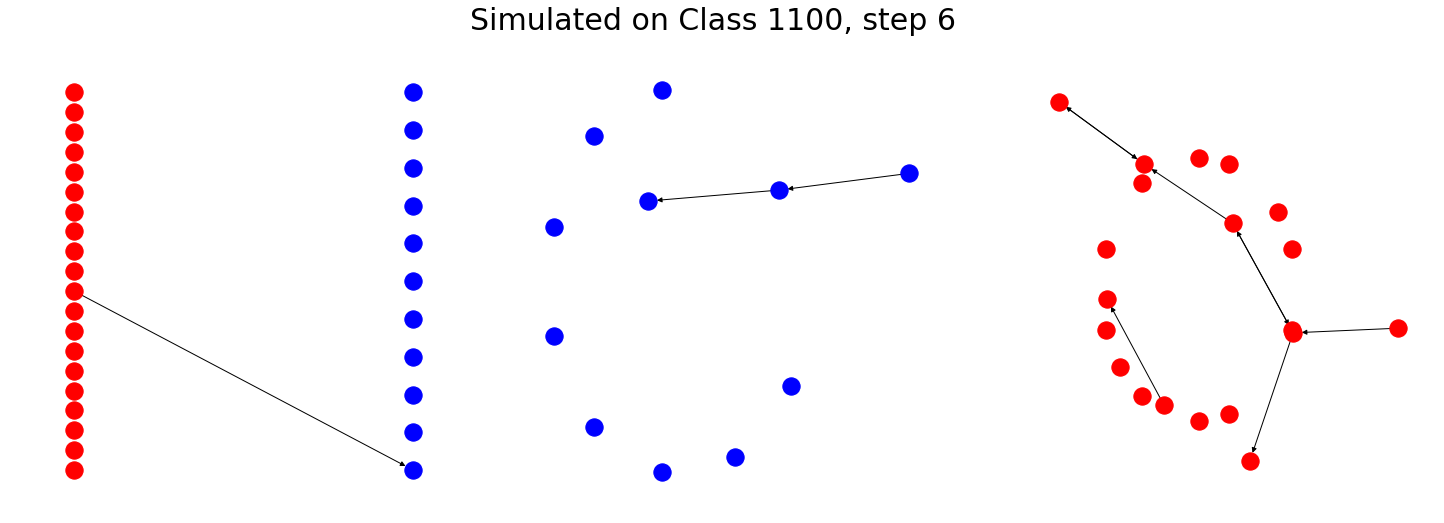

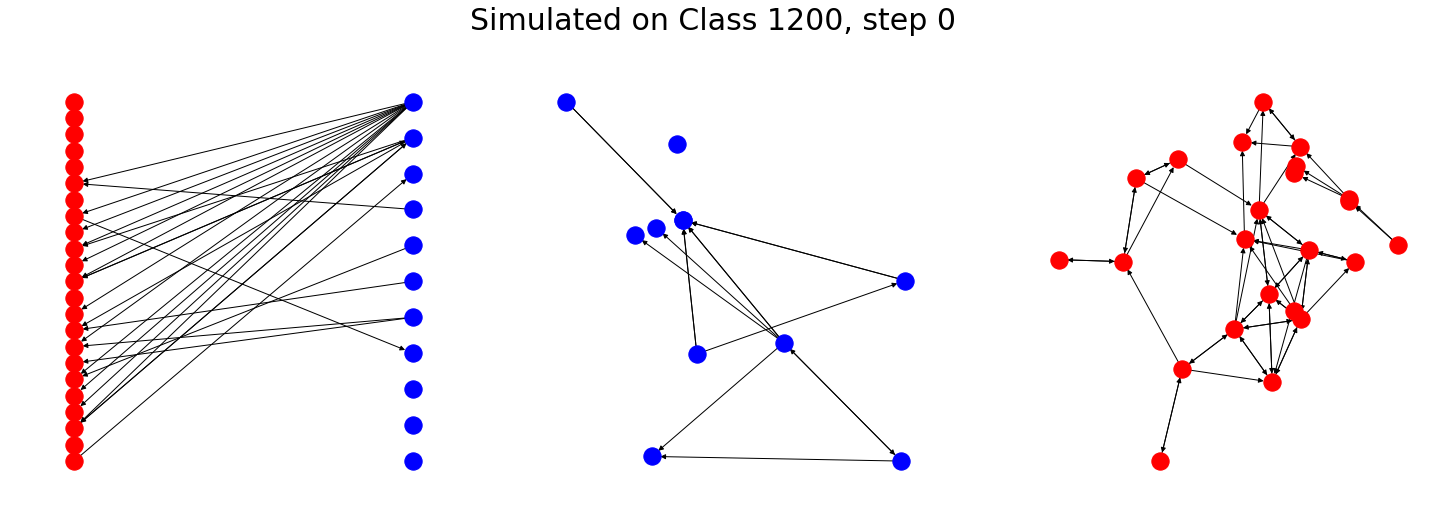

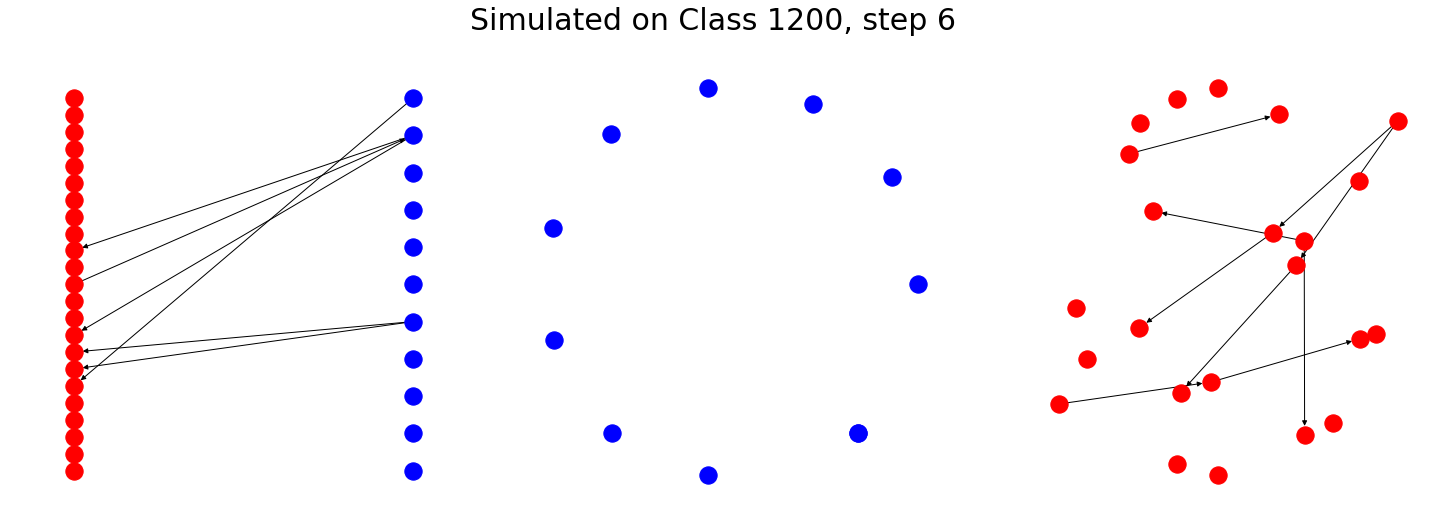

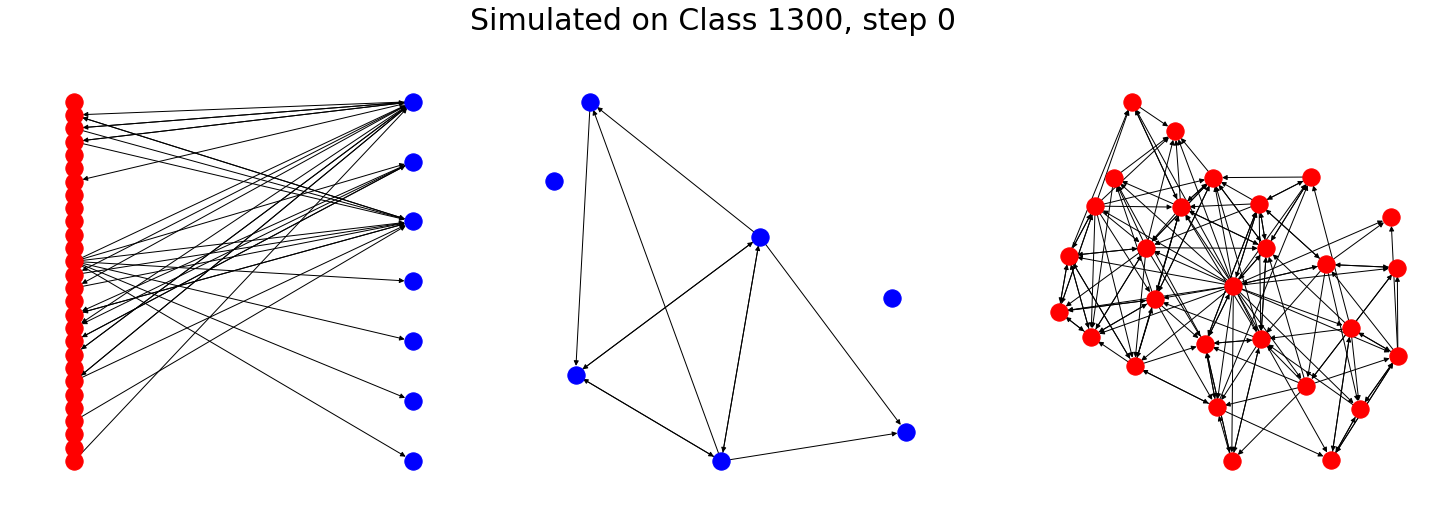

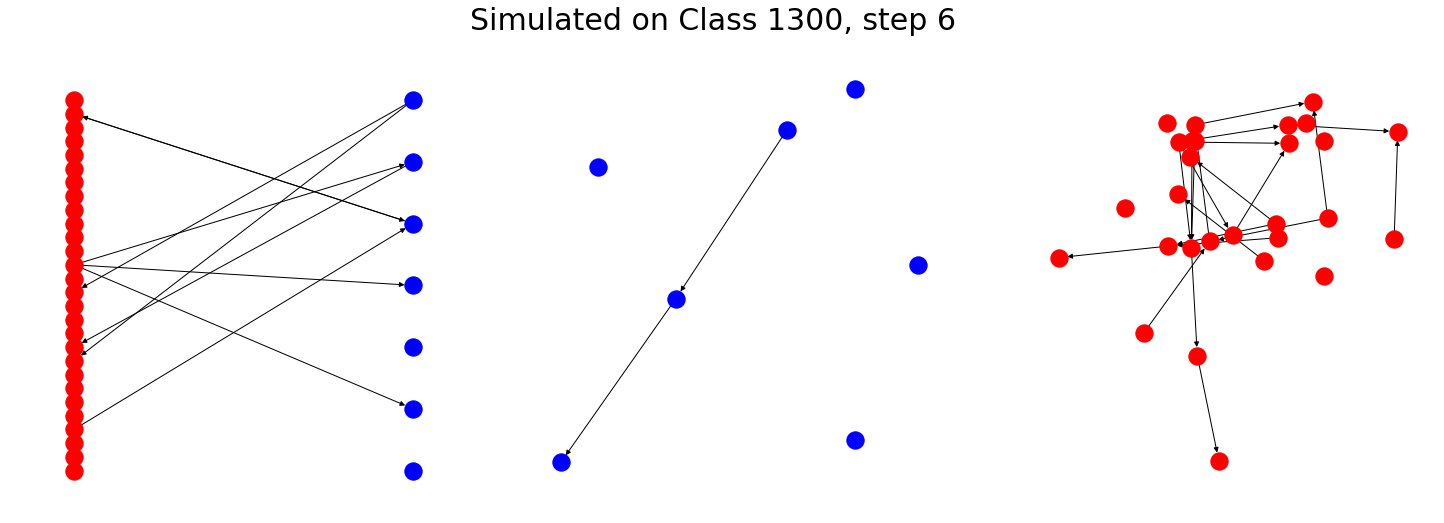

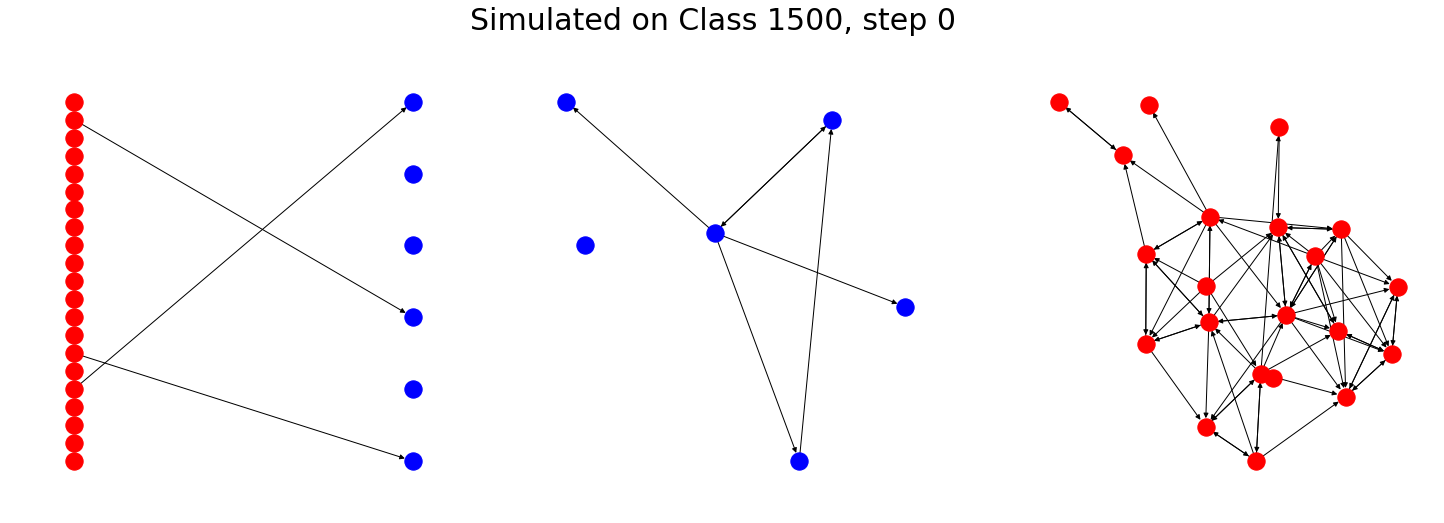

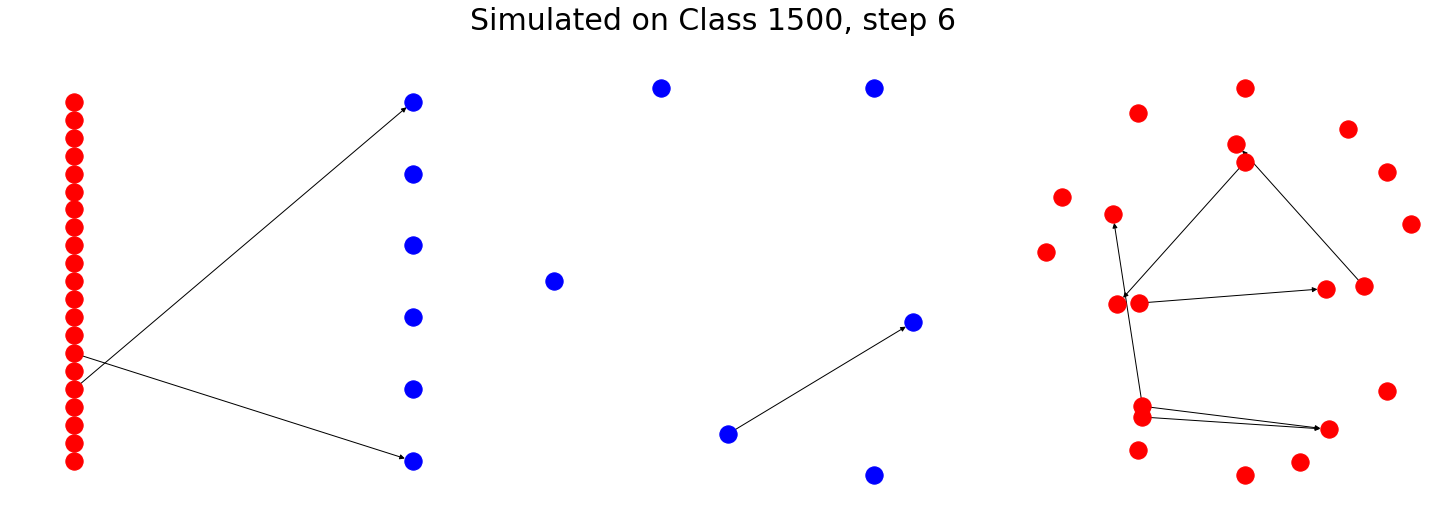

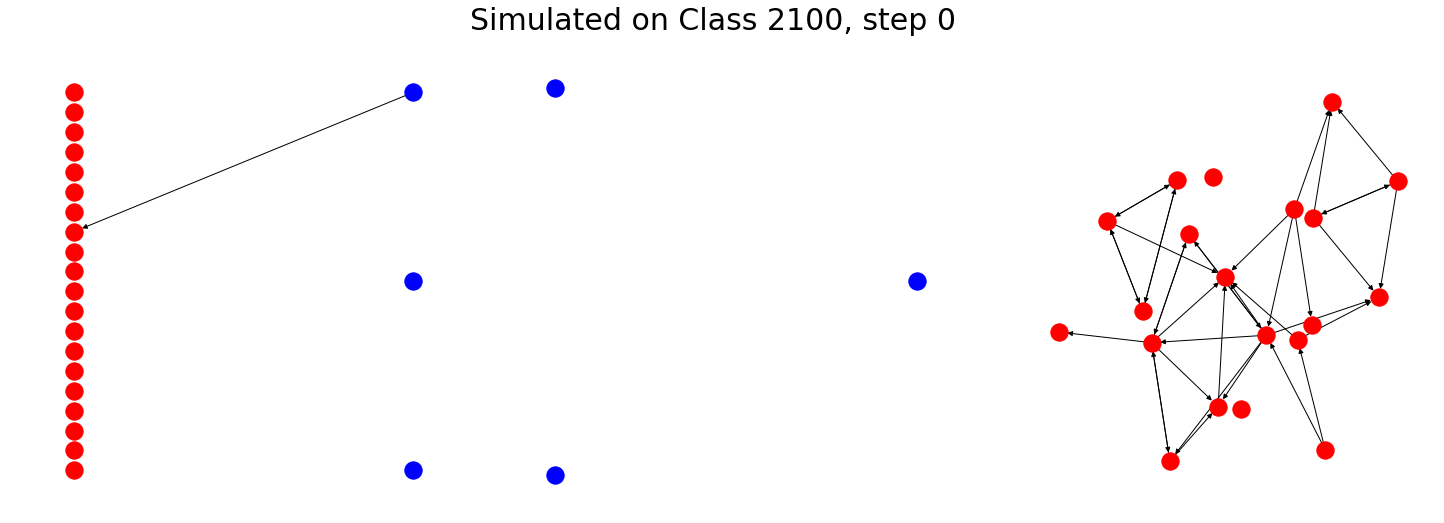

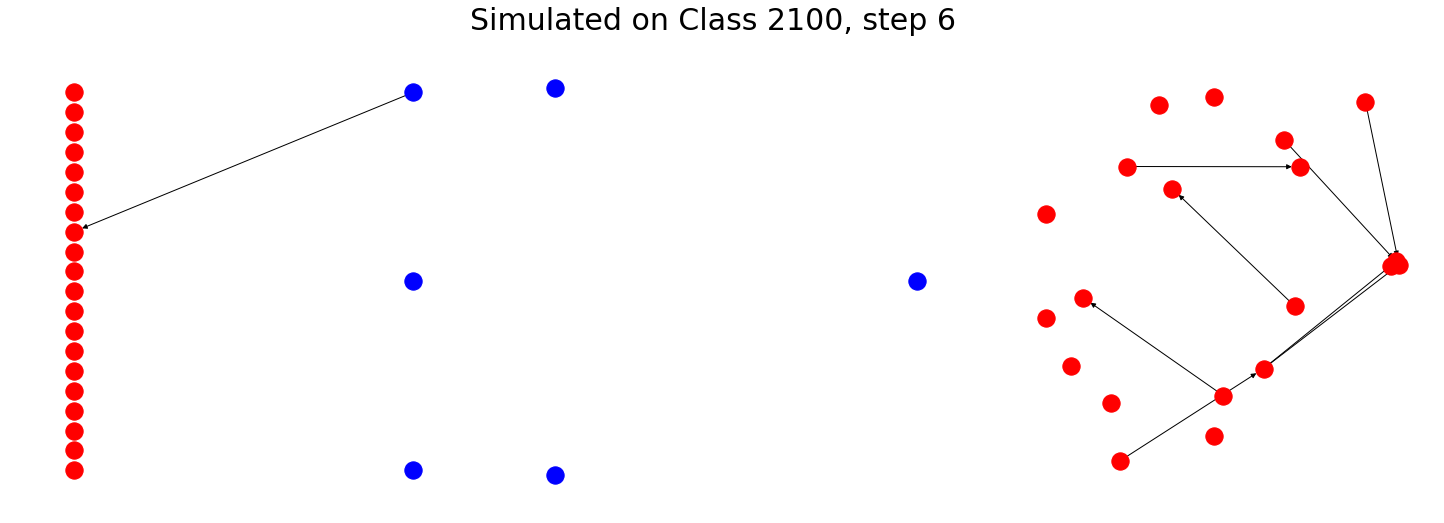

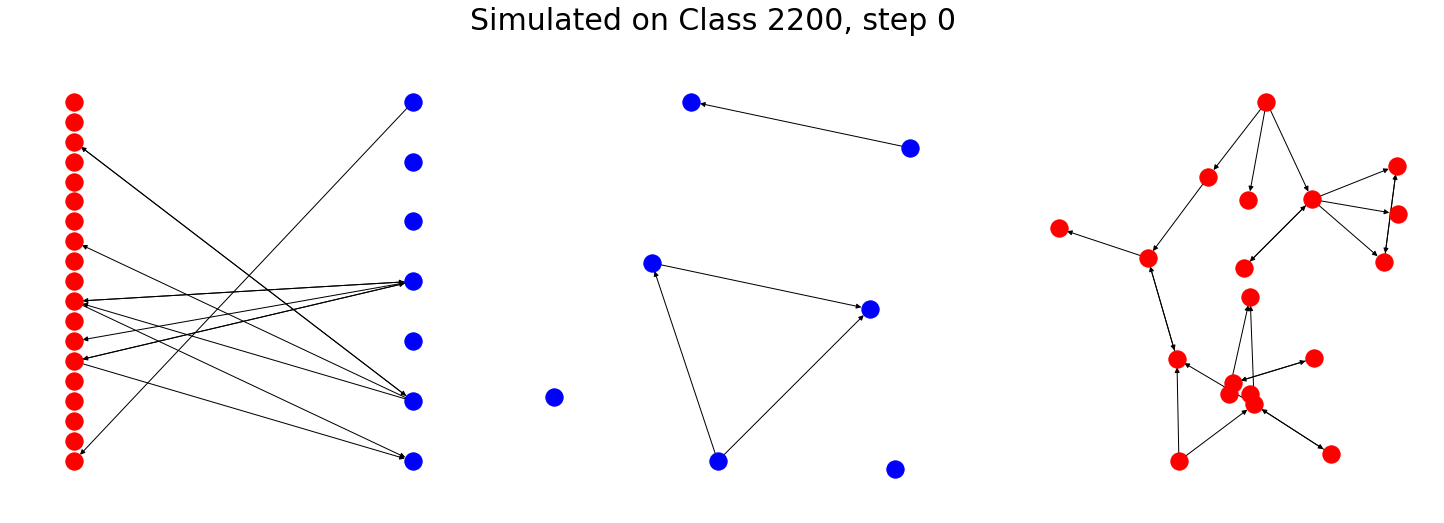

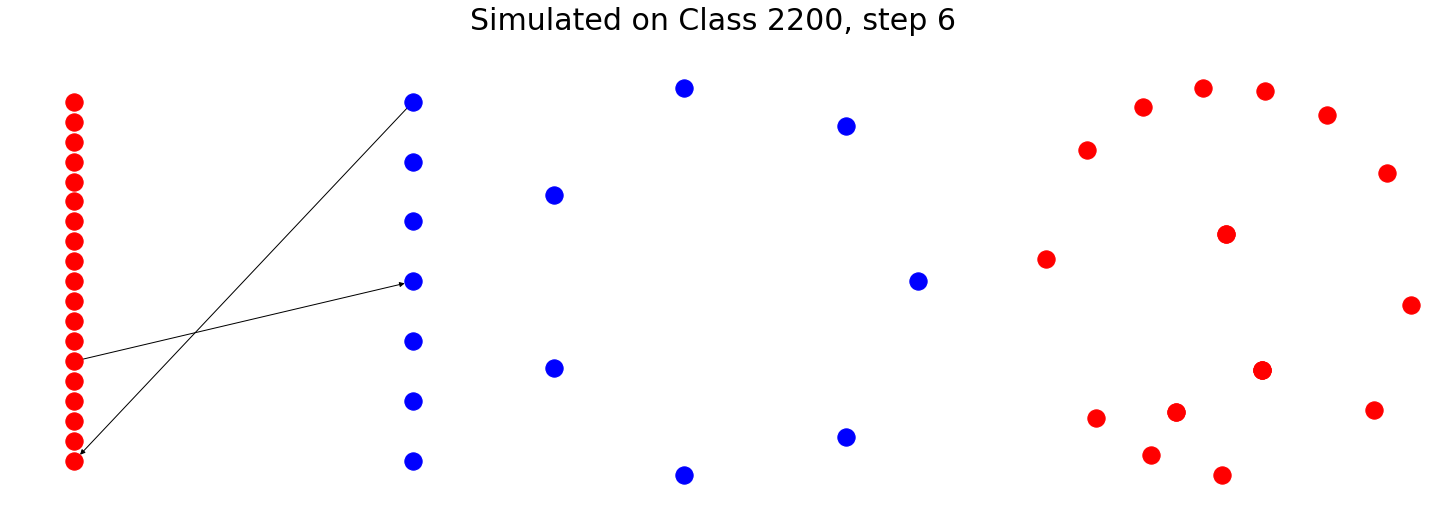

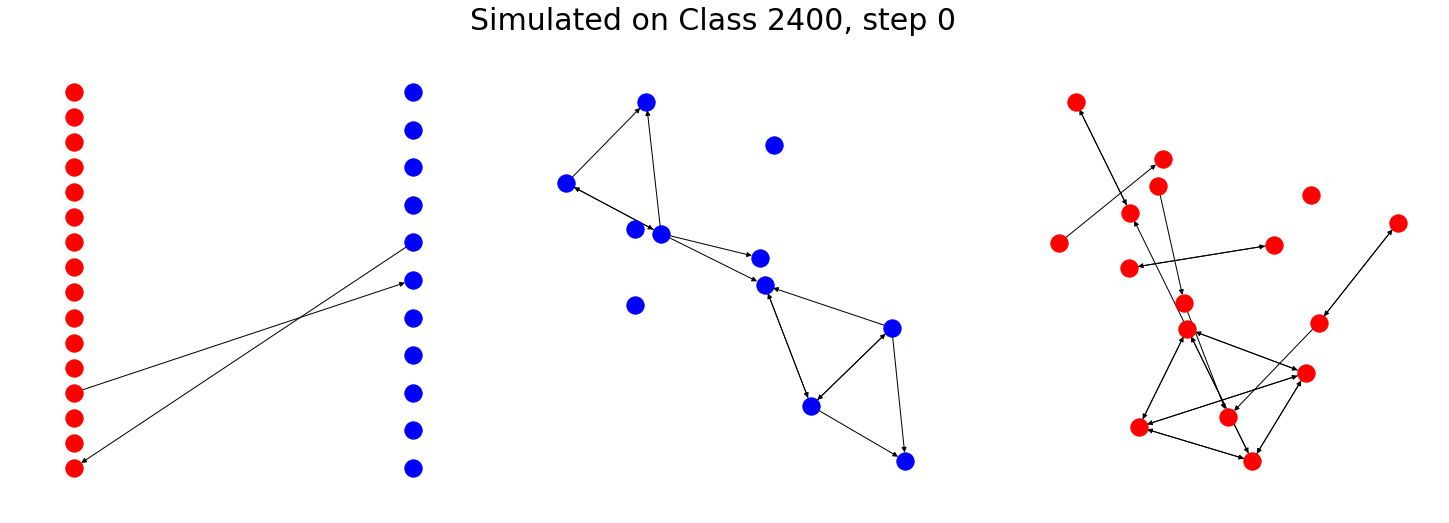

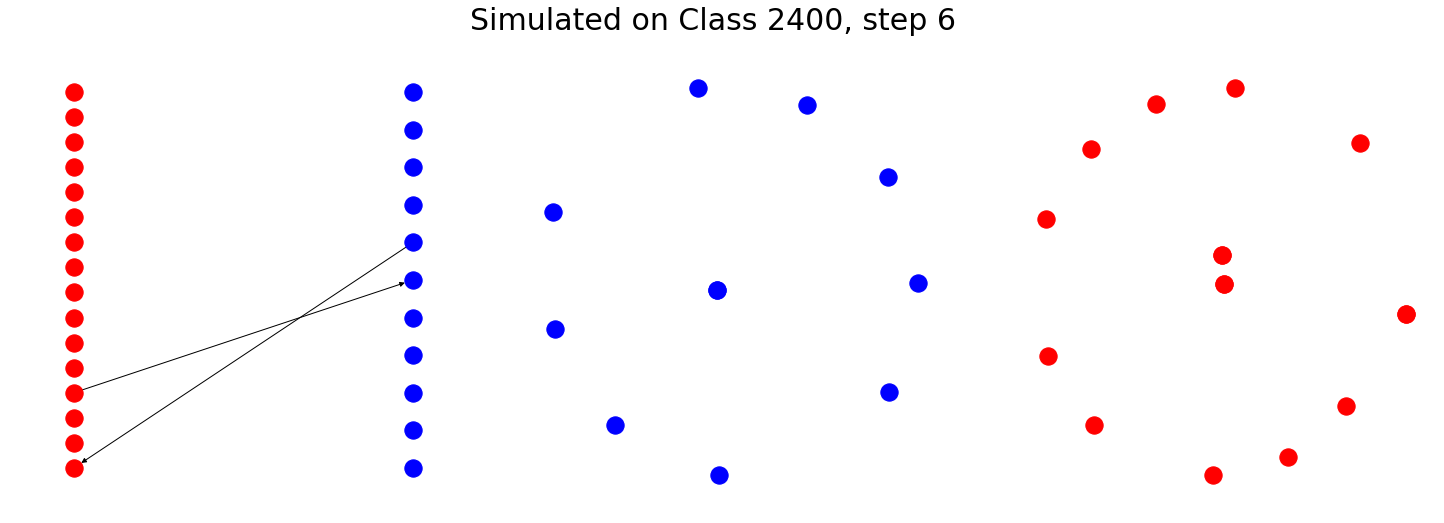

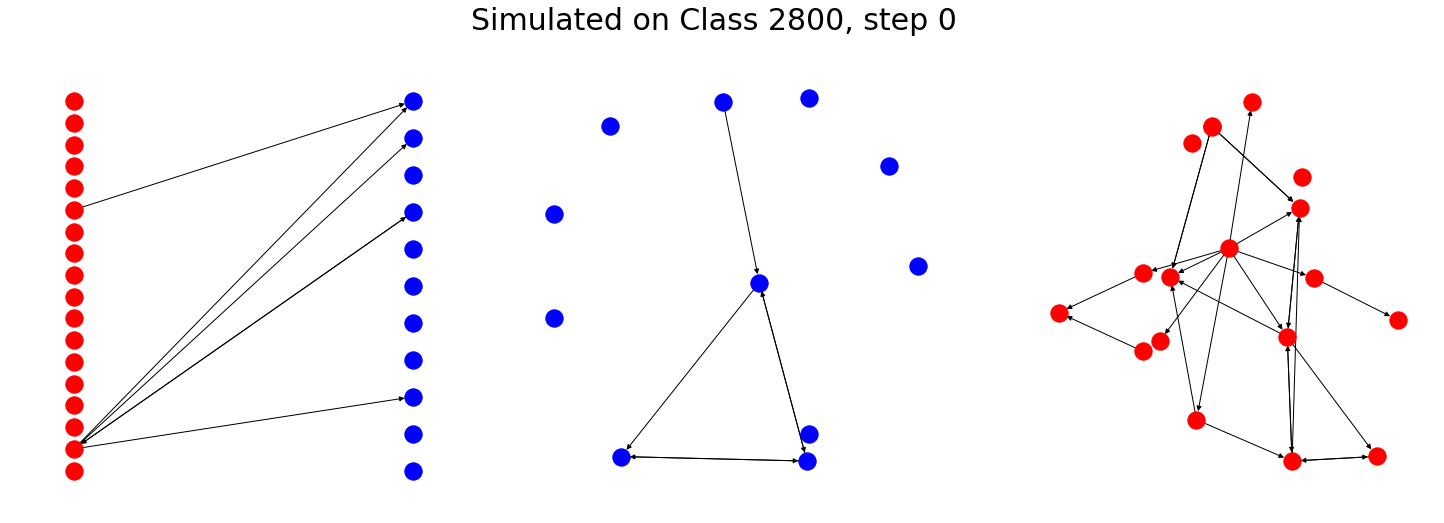

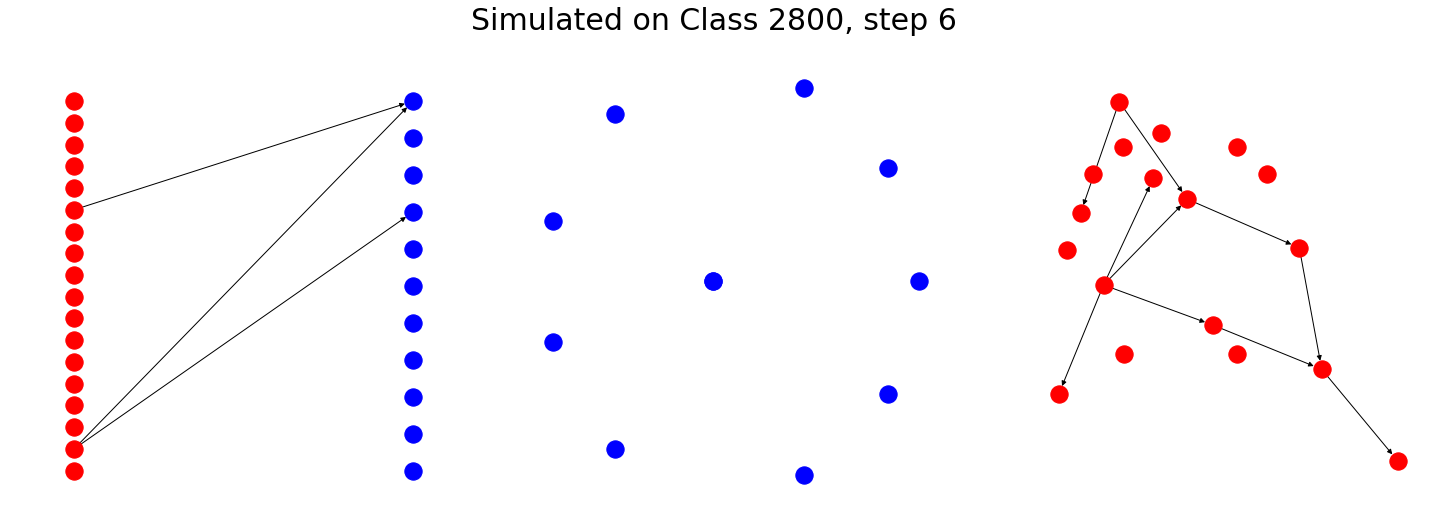

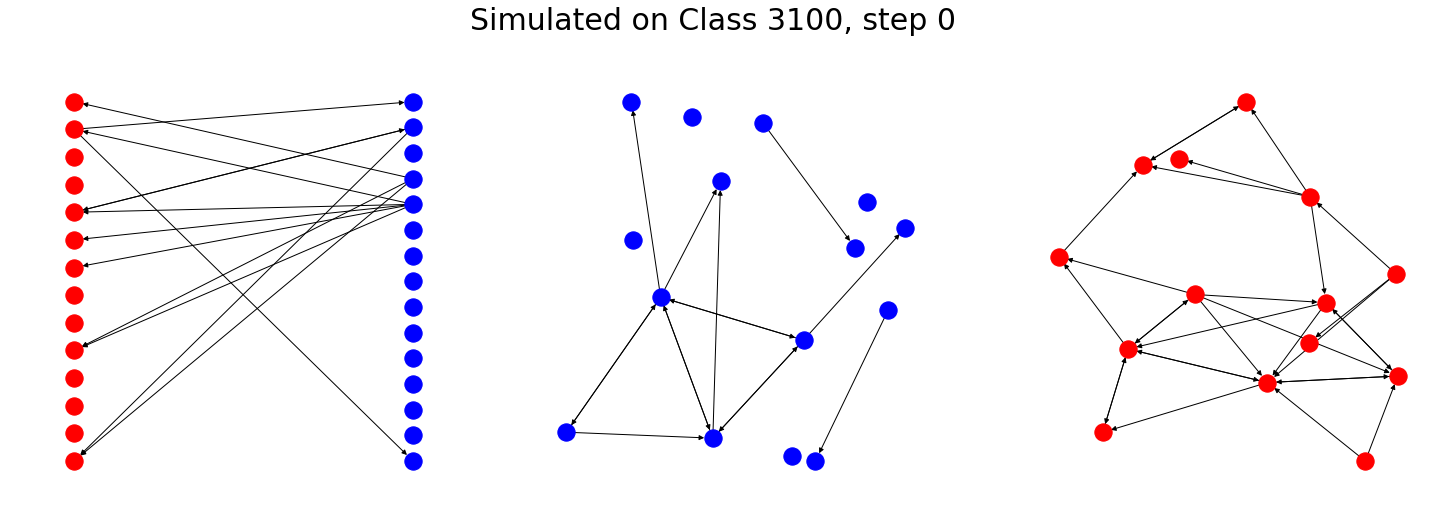

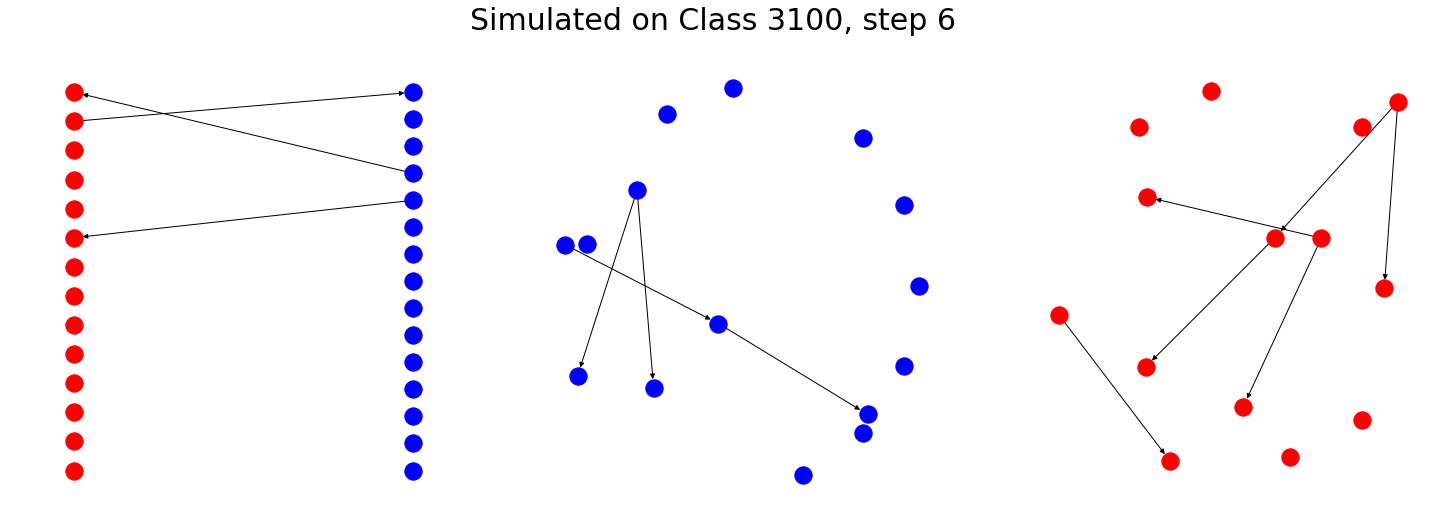

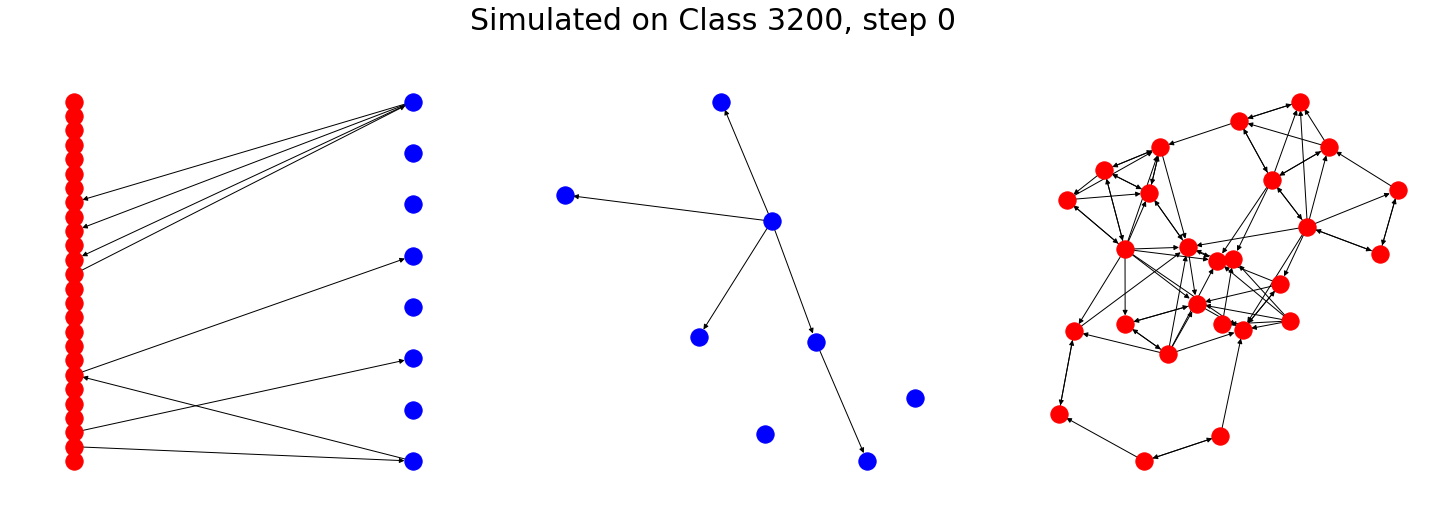

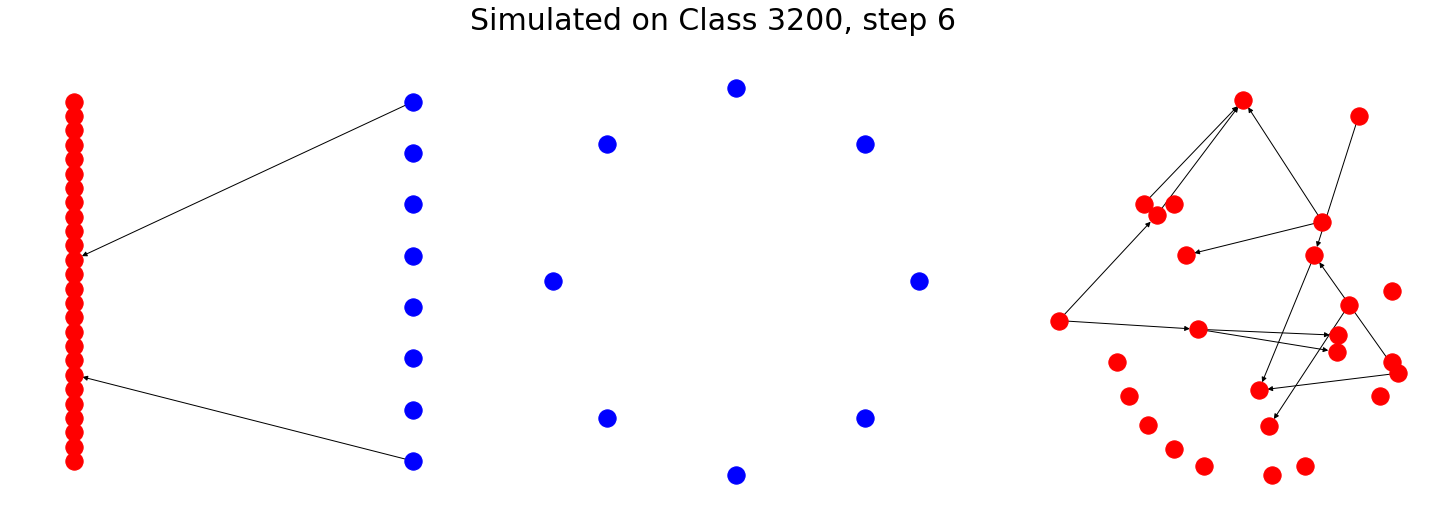

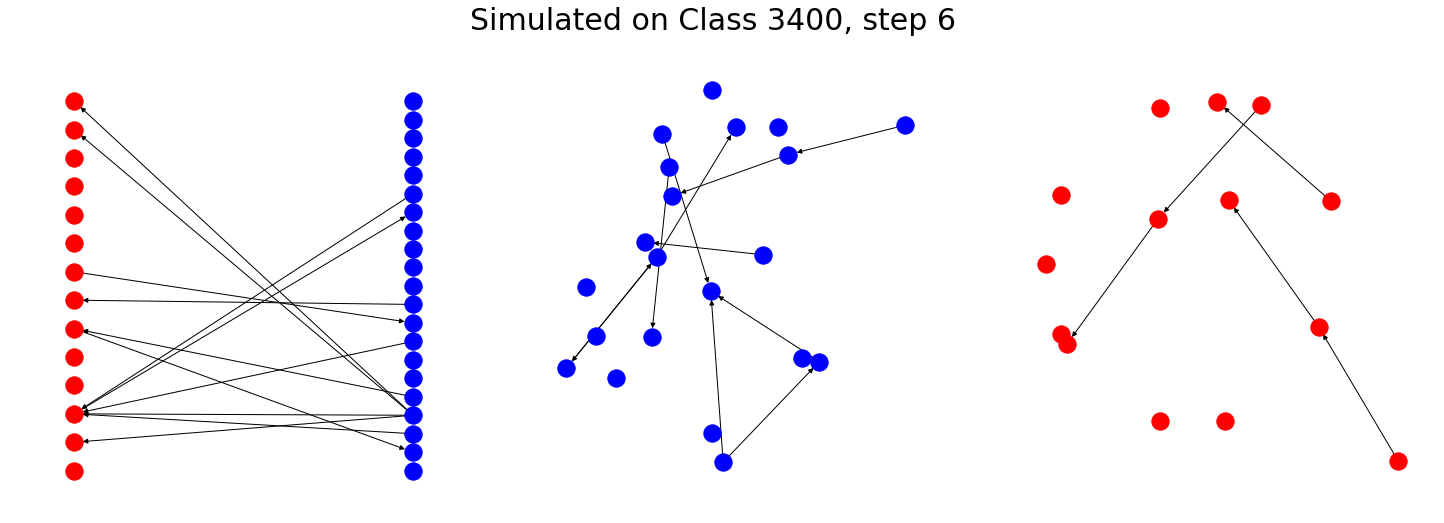

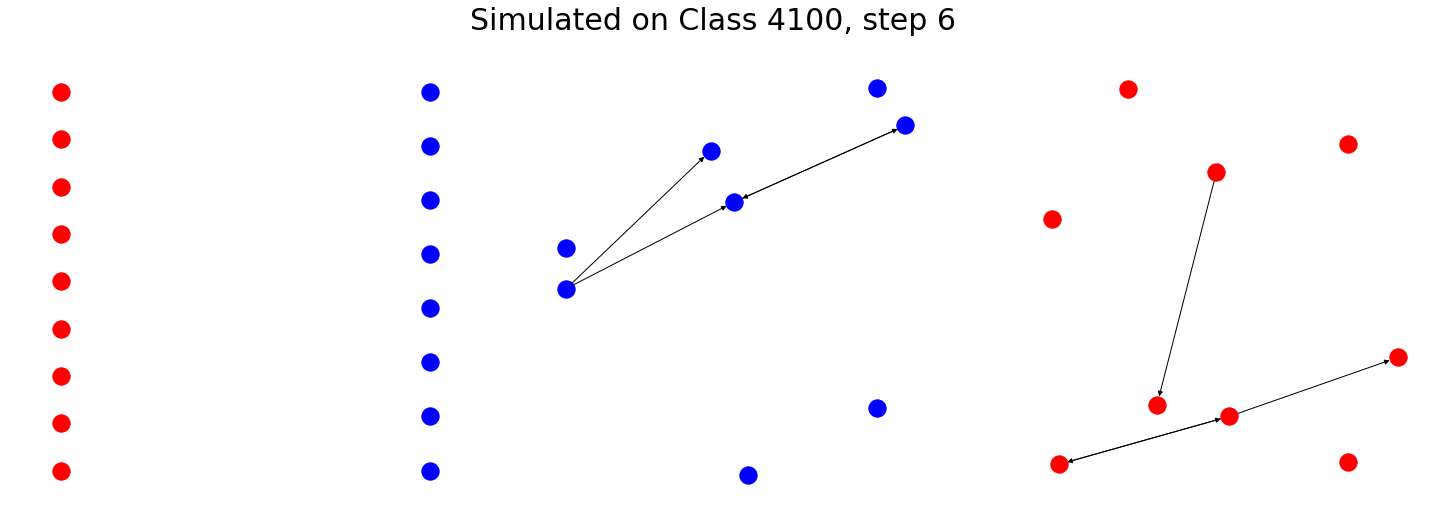

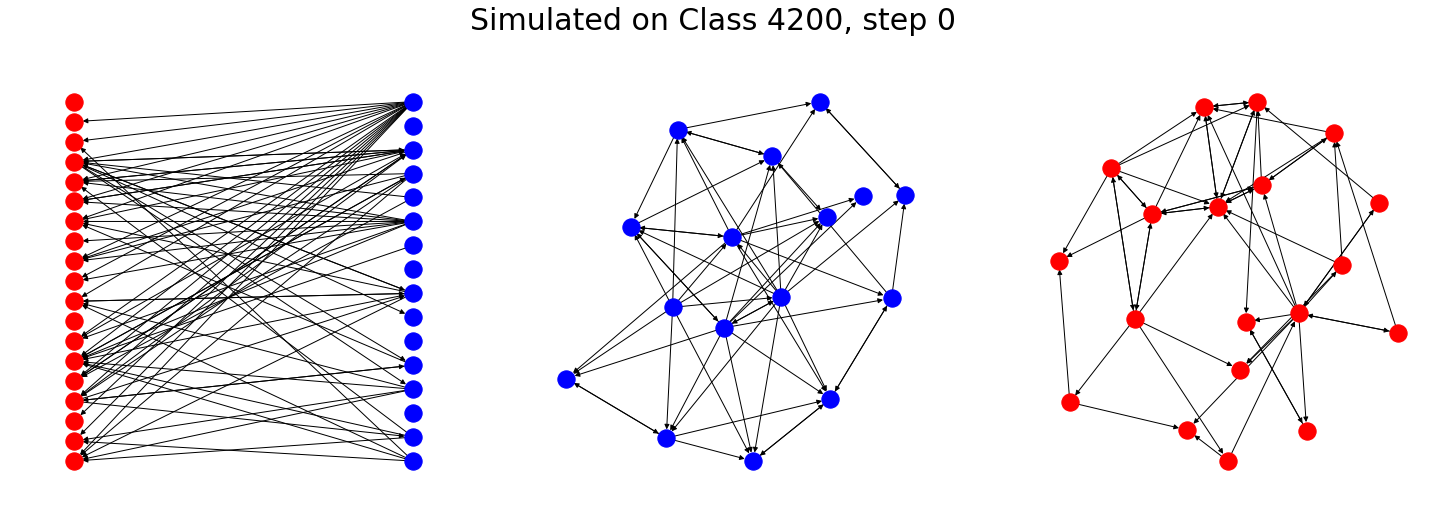

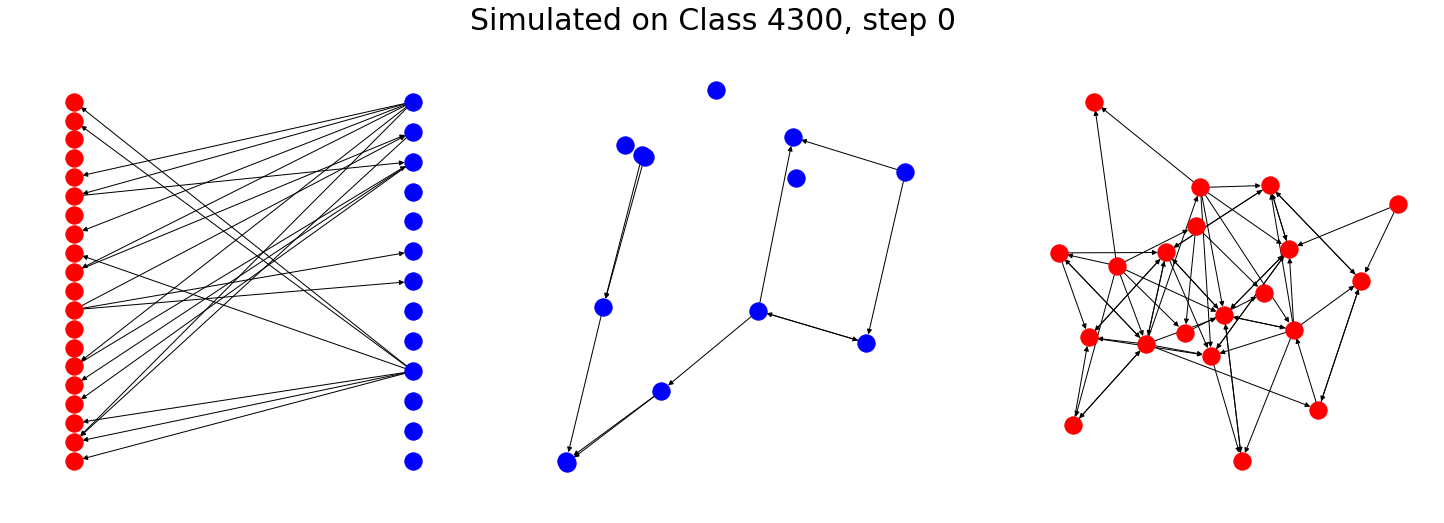

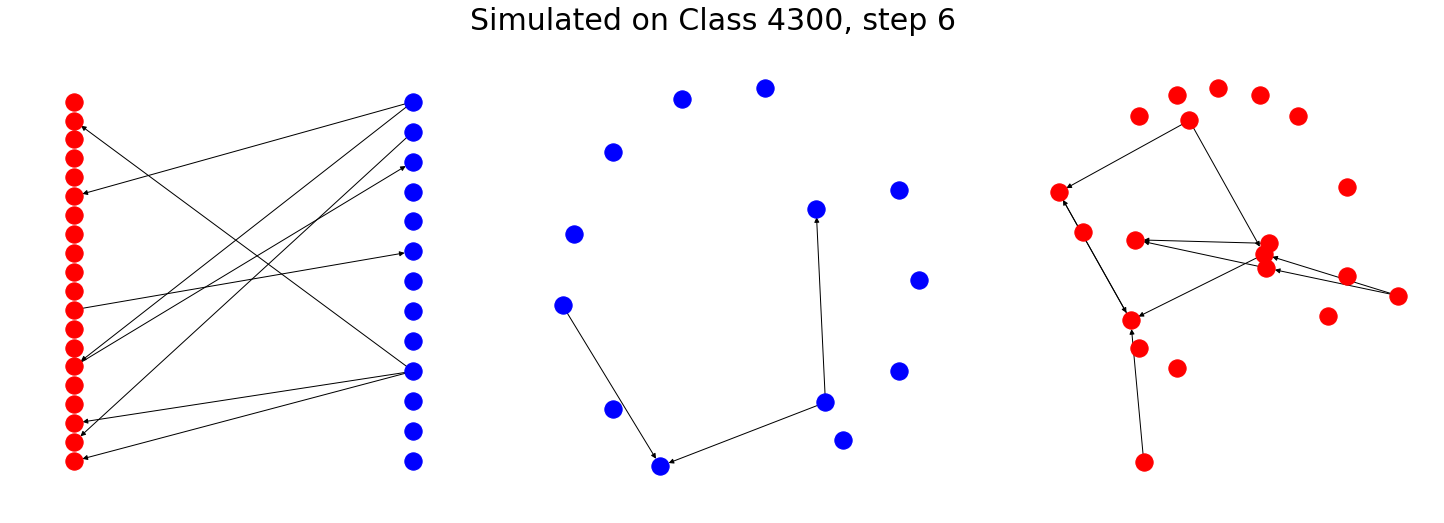

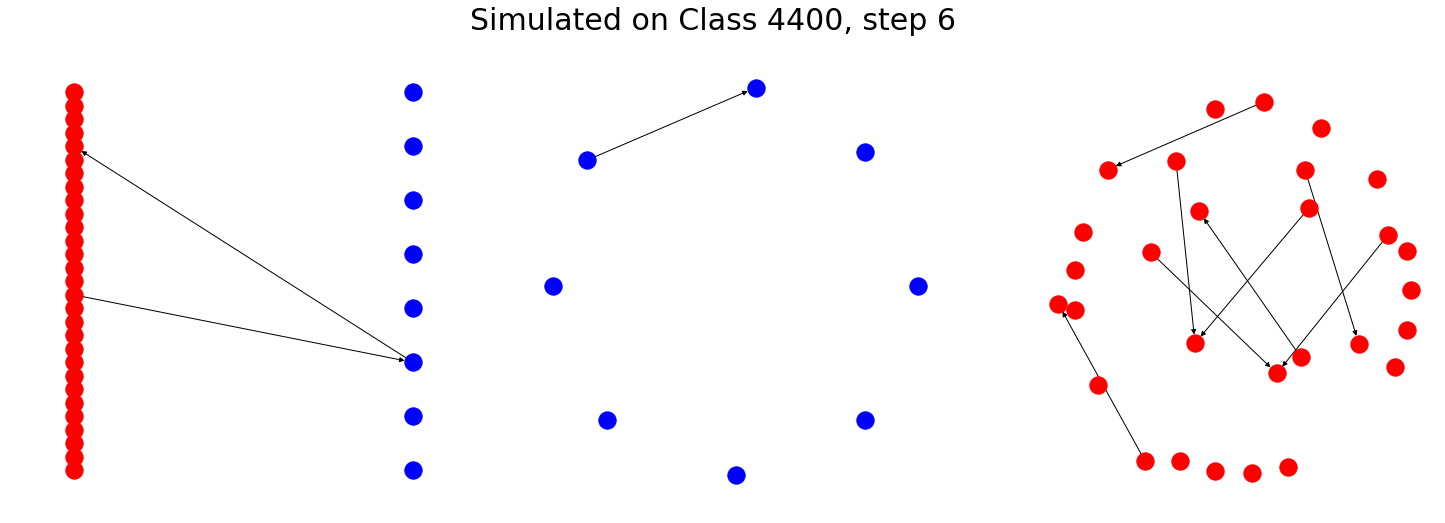

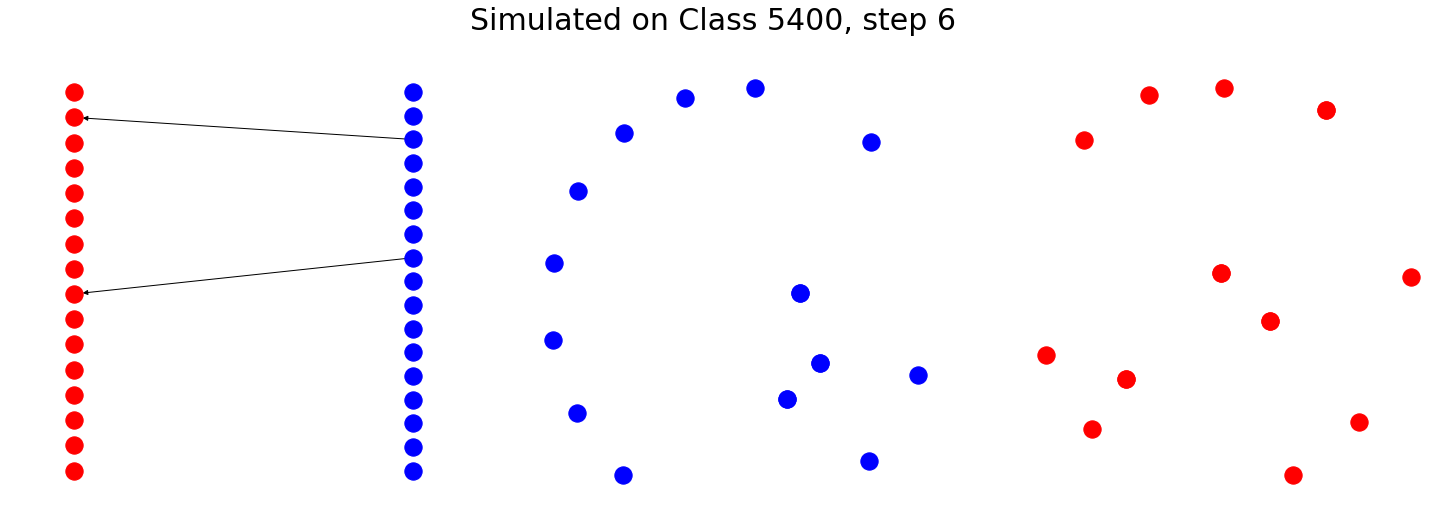

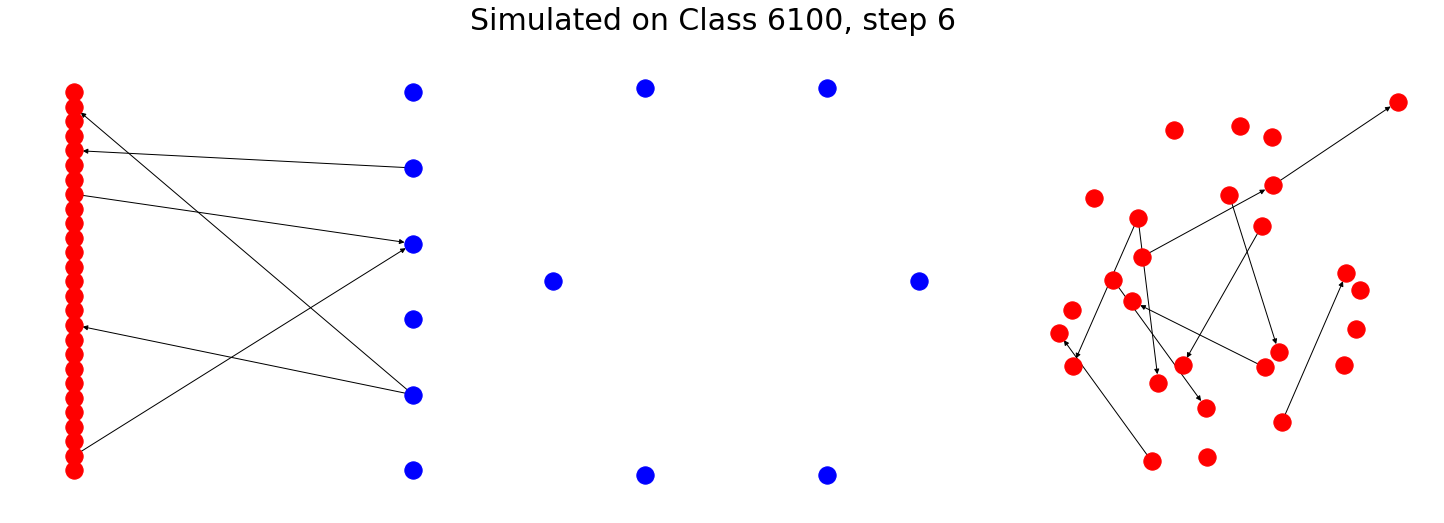

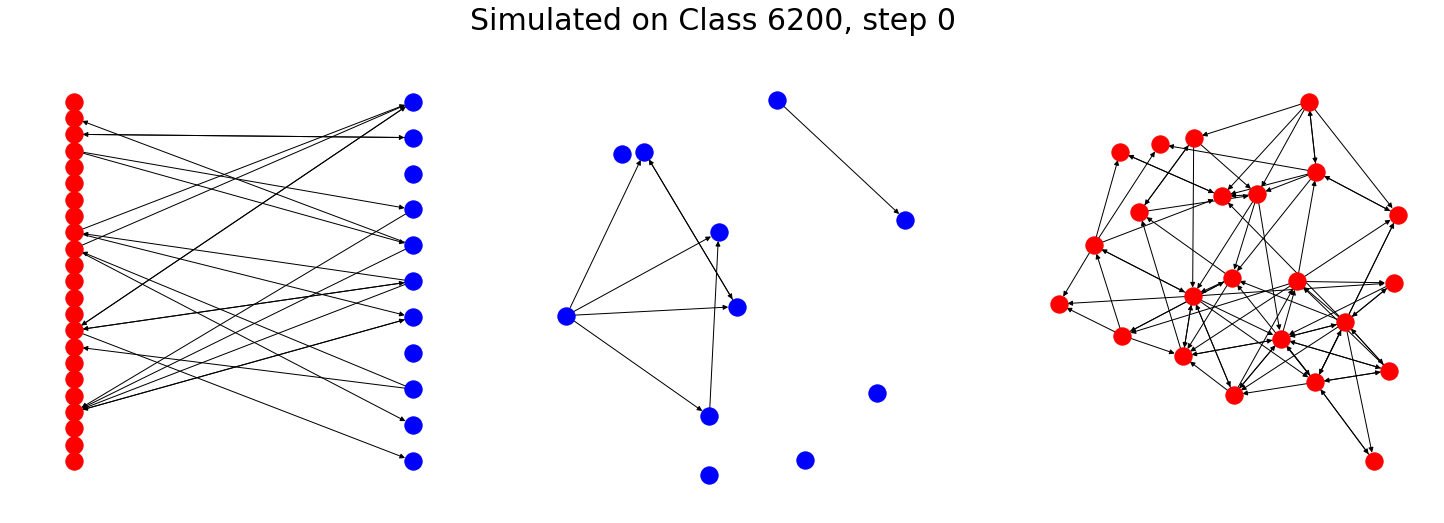

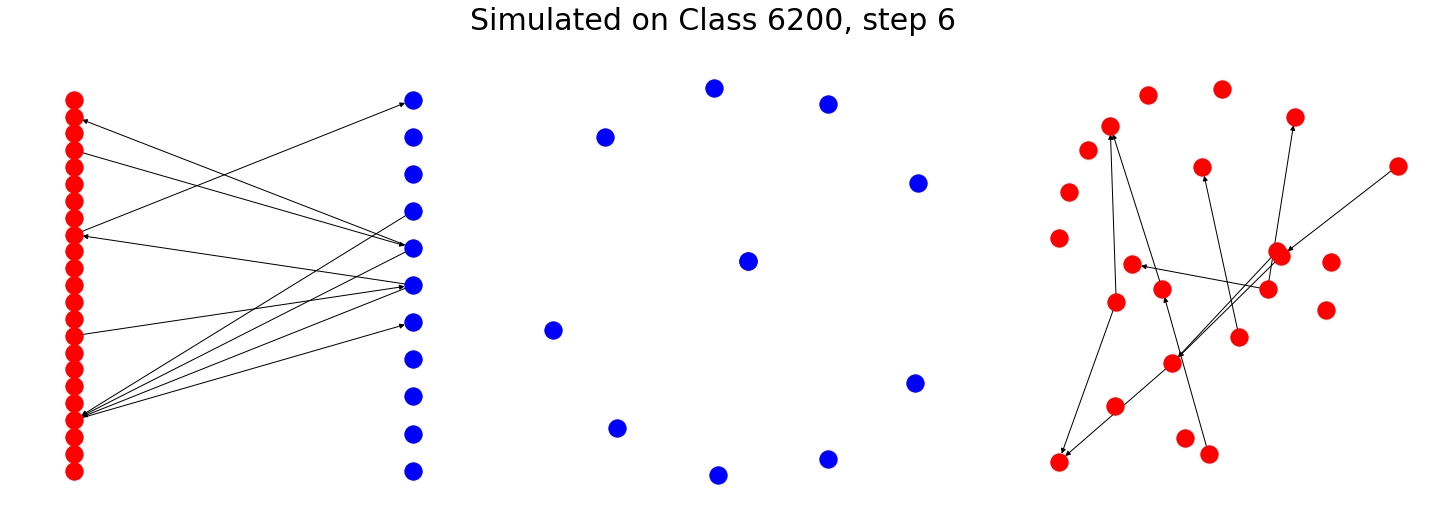

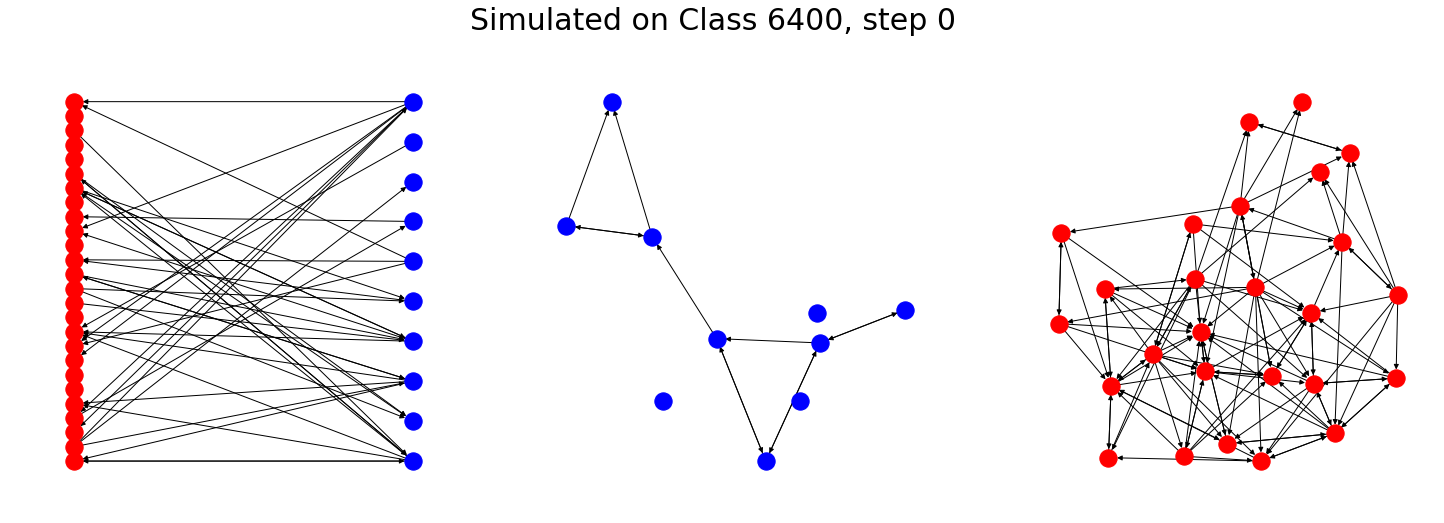

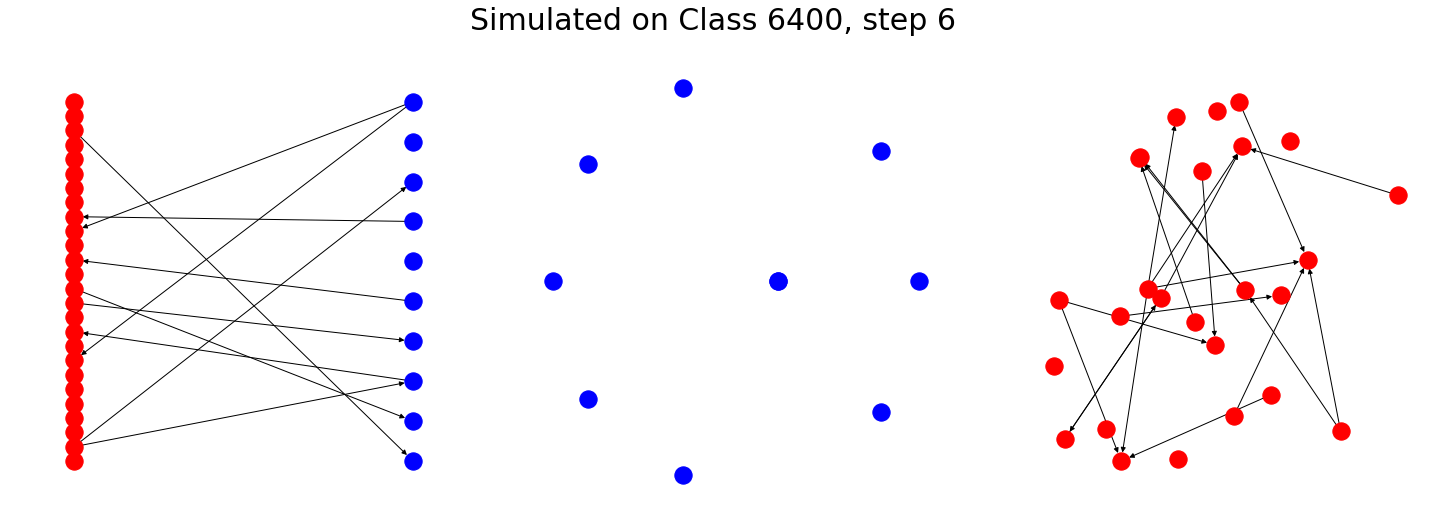

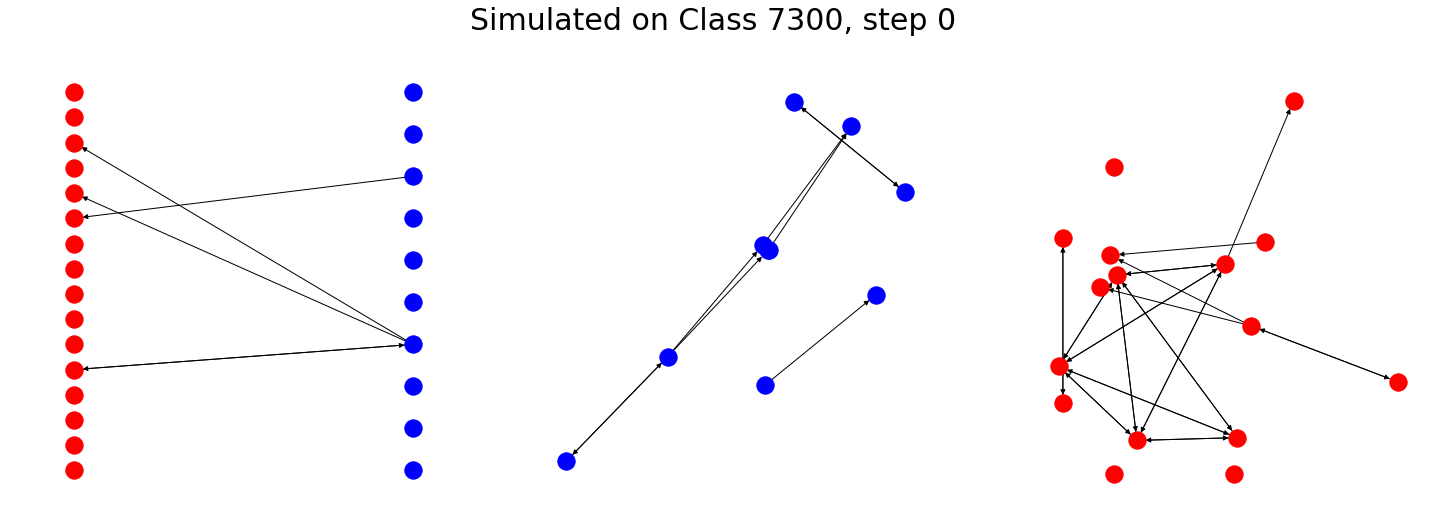

In [7]:
# Visualize all classes in step 0 and step #NUM_STEP
for class_id in class_ids:
    visualize(simulated_networks[class_id][0], class_id, 0)
    visualize(simulated_networks[class_id][NUM_STEP], class_id, NUM_STEP)

In [ ]:
### Simulation by using simple model

In [8]:
# Set parameters
NUM_STEP = 6
bonus_m2m = 0.1
bonus_f2f = 0.1
bonus_for_friends = 0.6395

In [9]:
# Prepare for simulation
simulated_networks = {}

for class_id in class_ids:
    trust_network = networks[class_id]
    affective_matrix = affective_matrices[class_id]
    model = TrustModel(trust_network, affective_matrix, mode, bonus_m2m, bonus_f2f, bonus_for_friends)
    simulated_networks[class_id] = model.run(NUM_STEP)

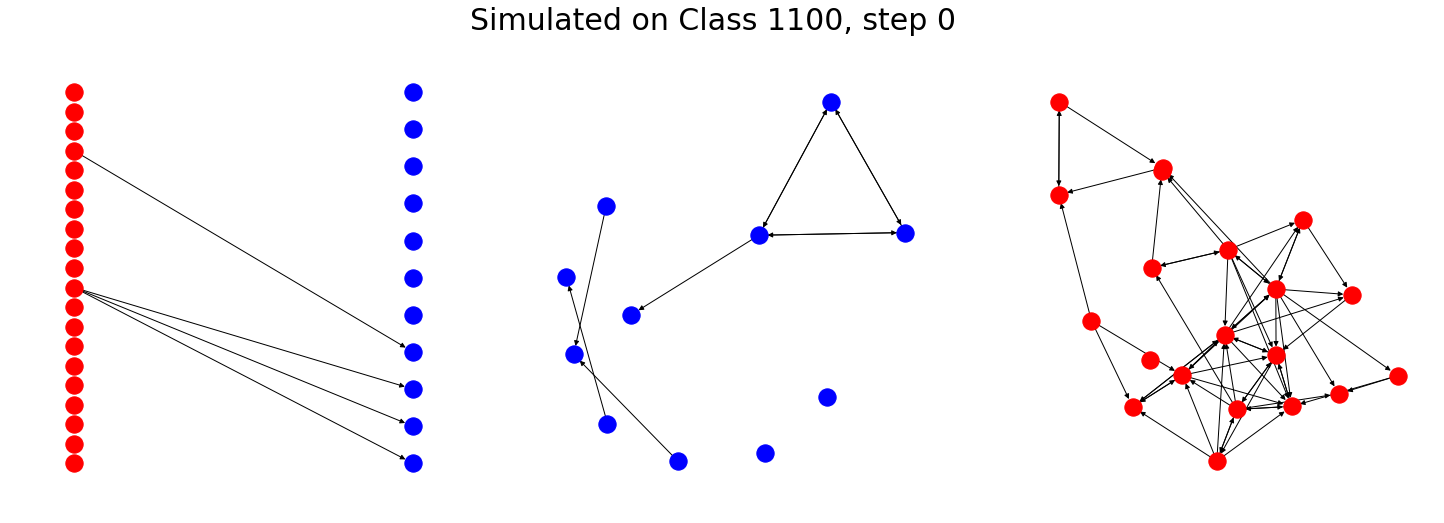

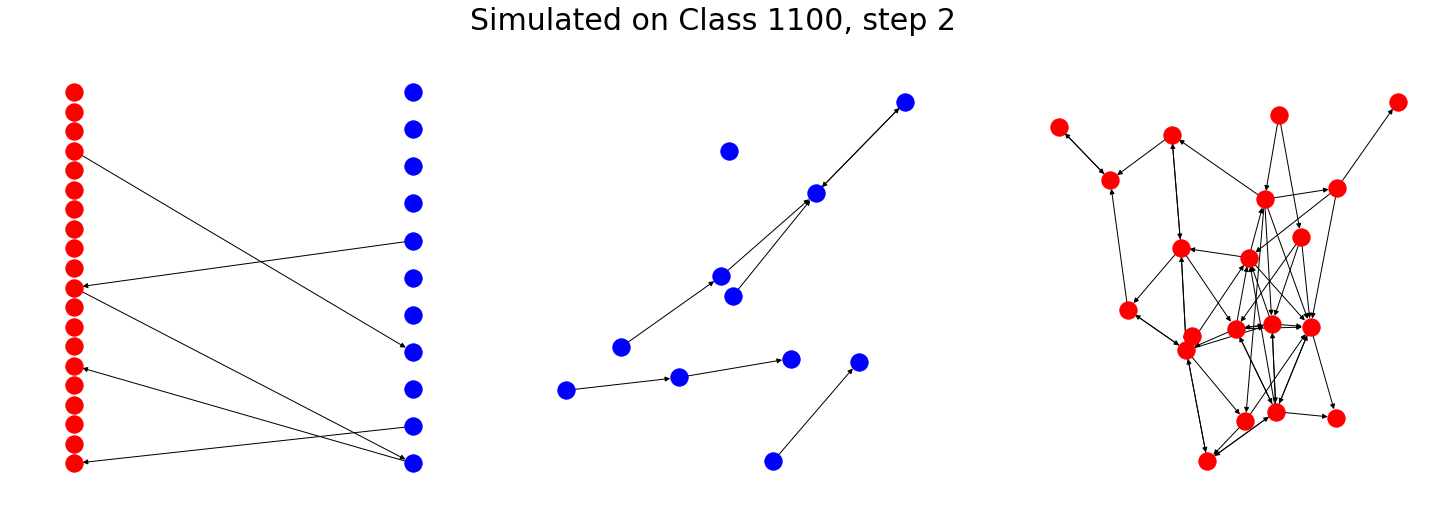

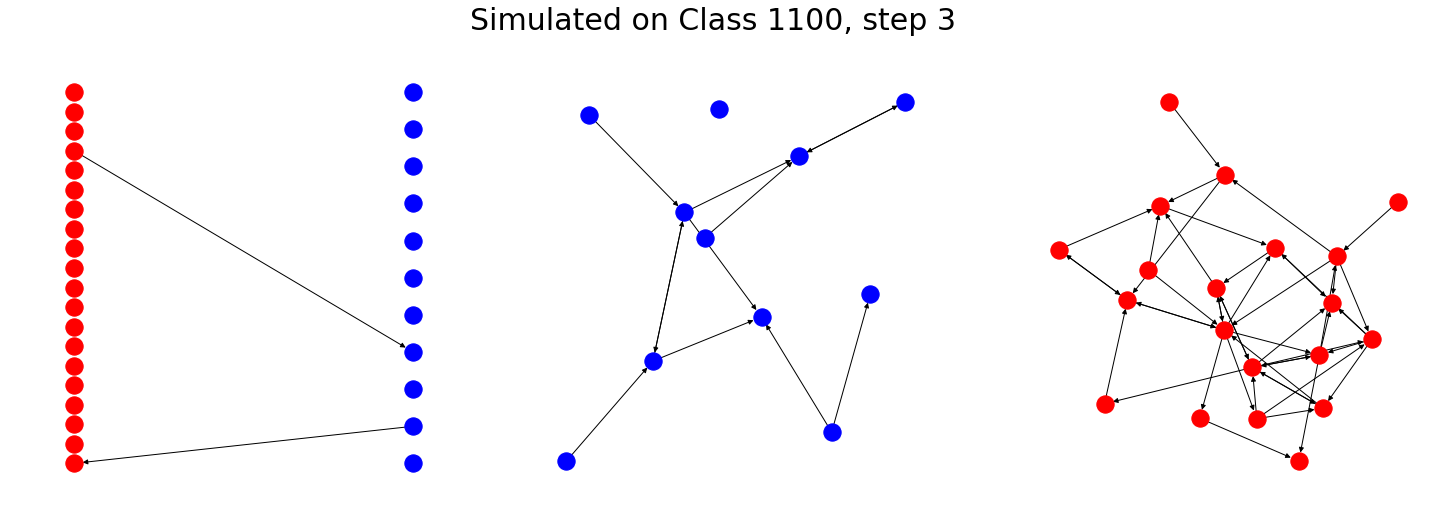

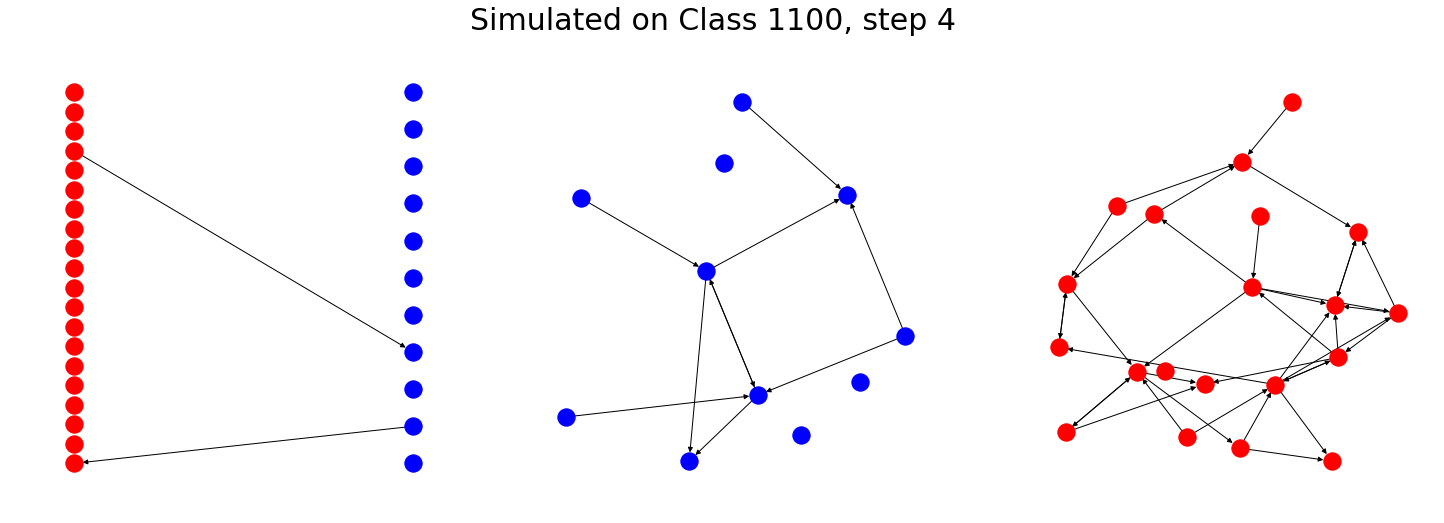

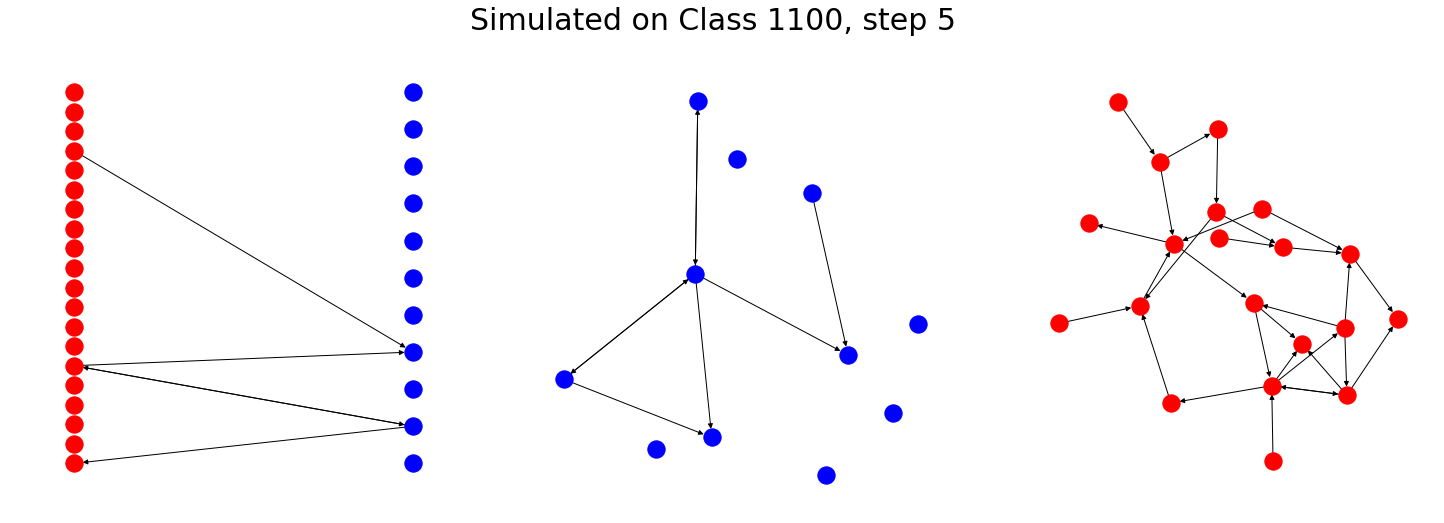

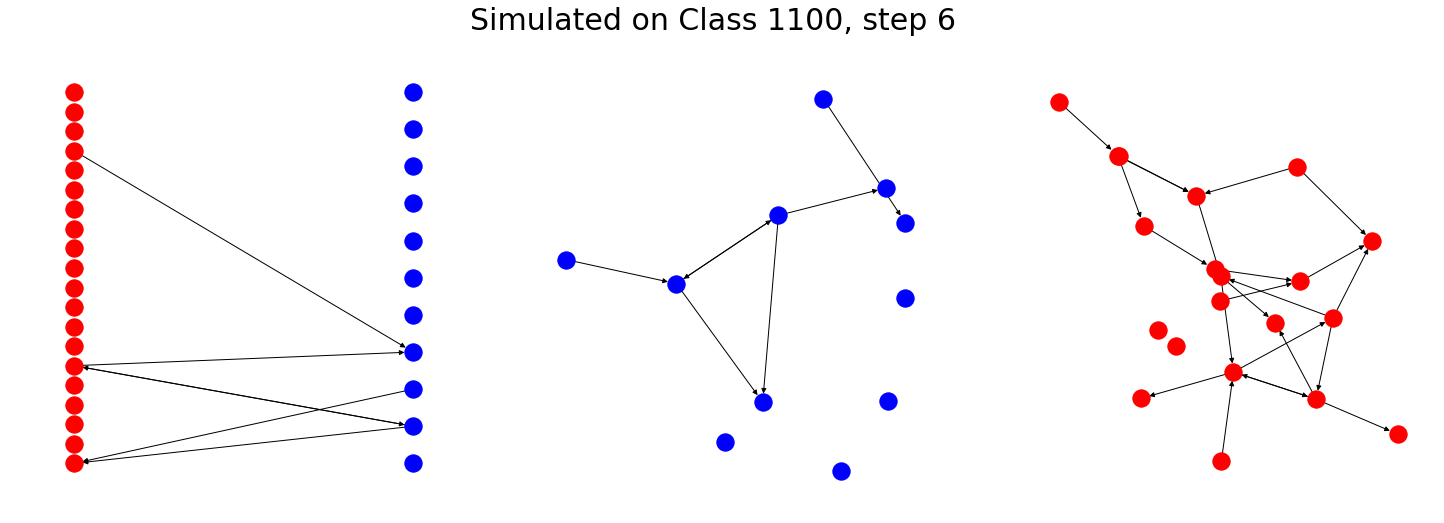

In [10]:
# Visualize a class in all steps
SELECTED_CLASS = 1100
for step in range(NUM_STEP + 1):
    visualize(simulated_networks[1100][step], SELECTED_CLASS, step)

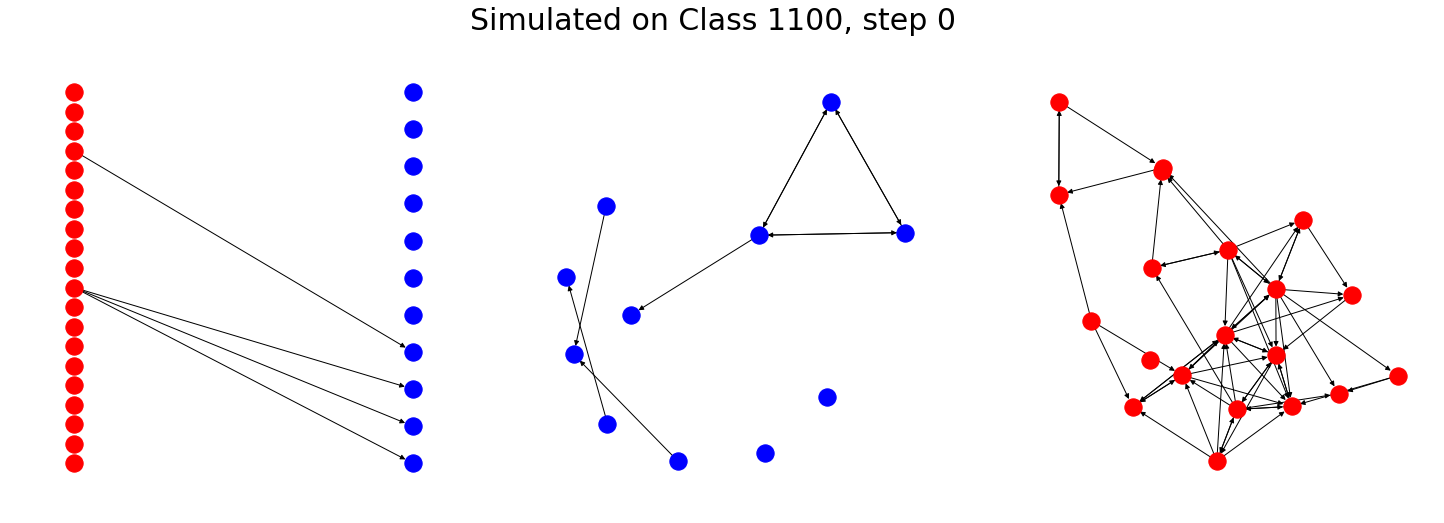

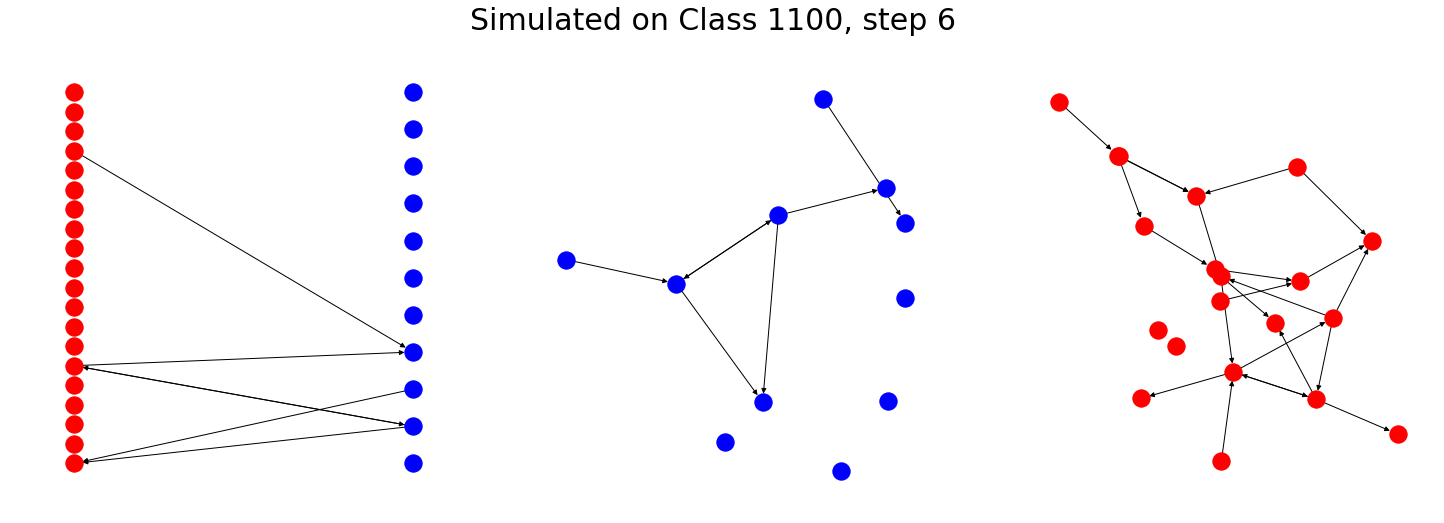

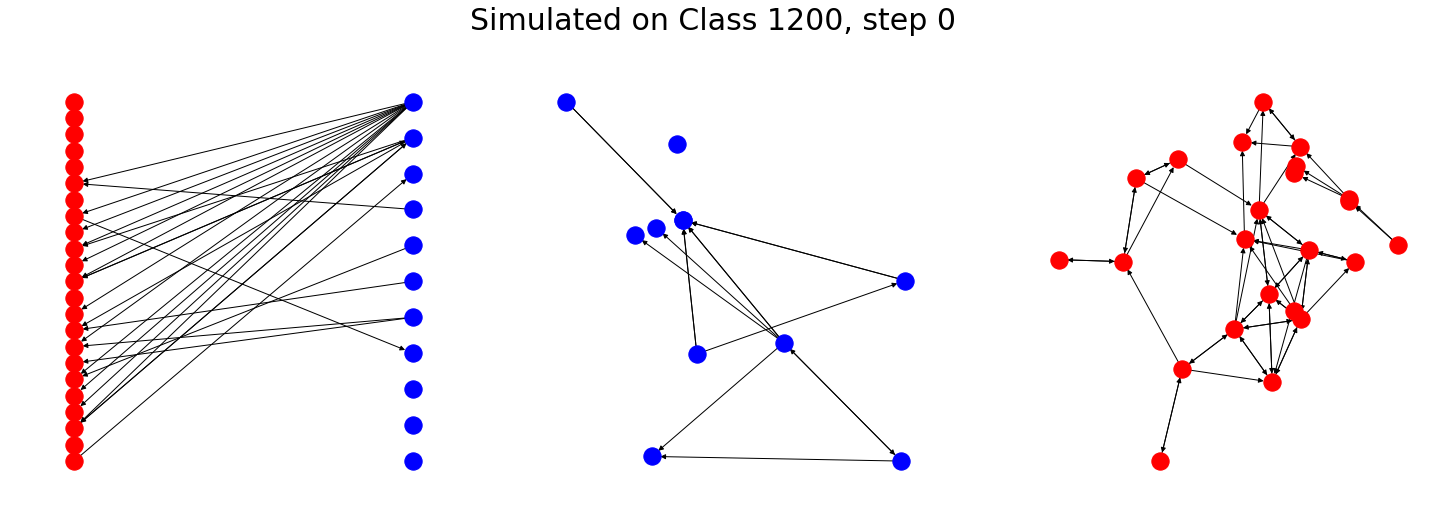

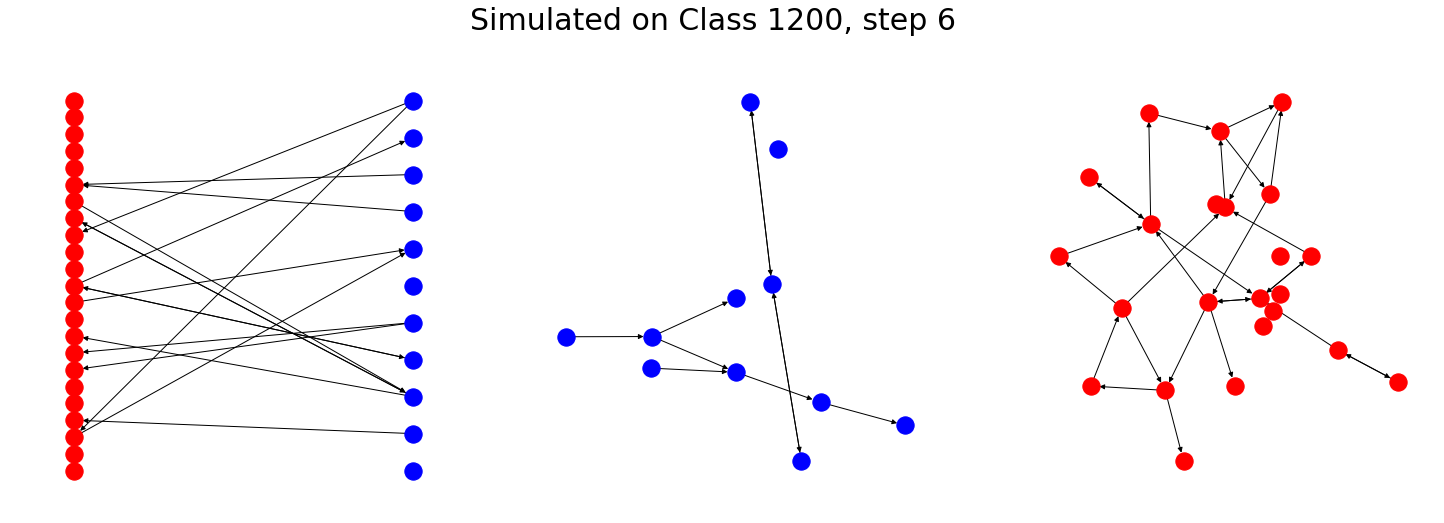

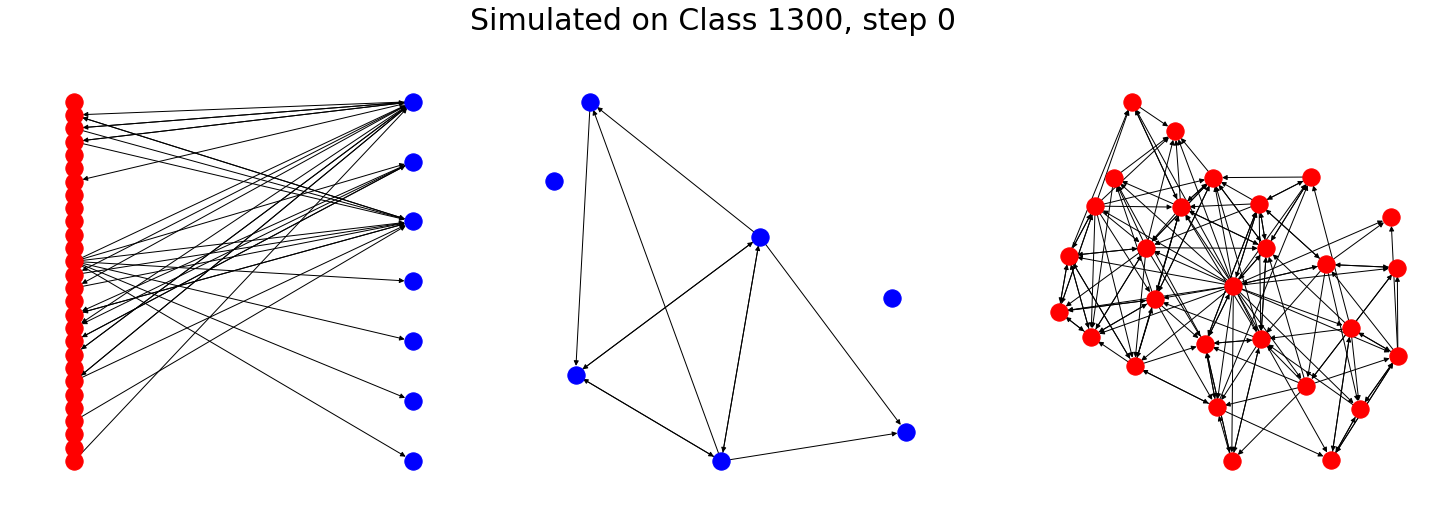

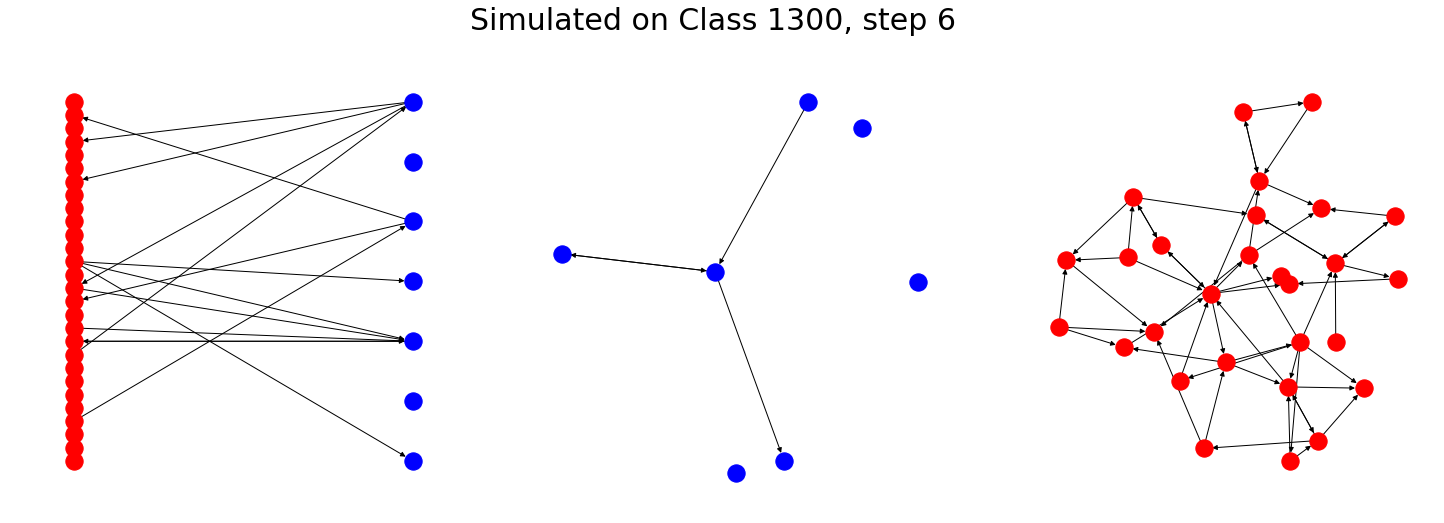

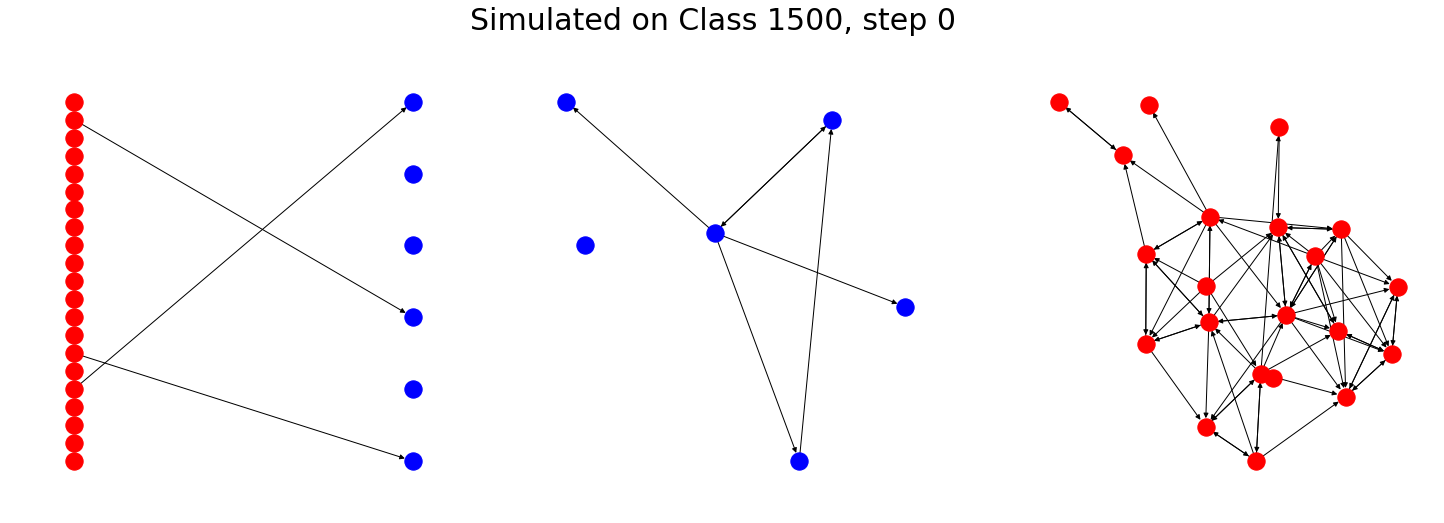

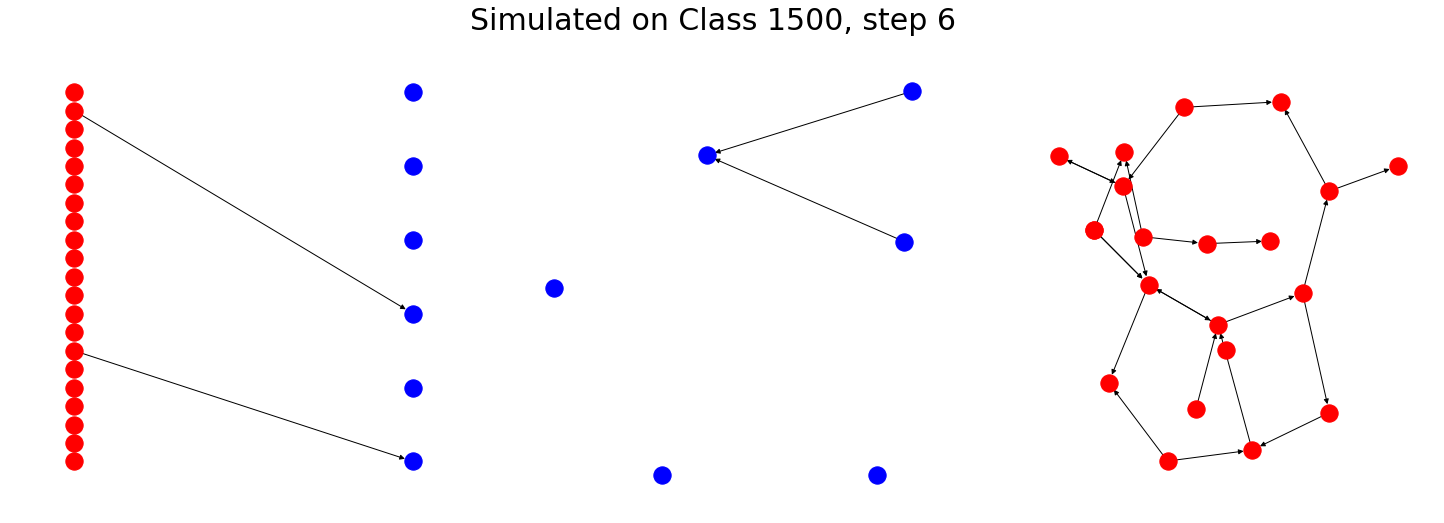

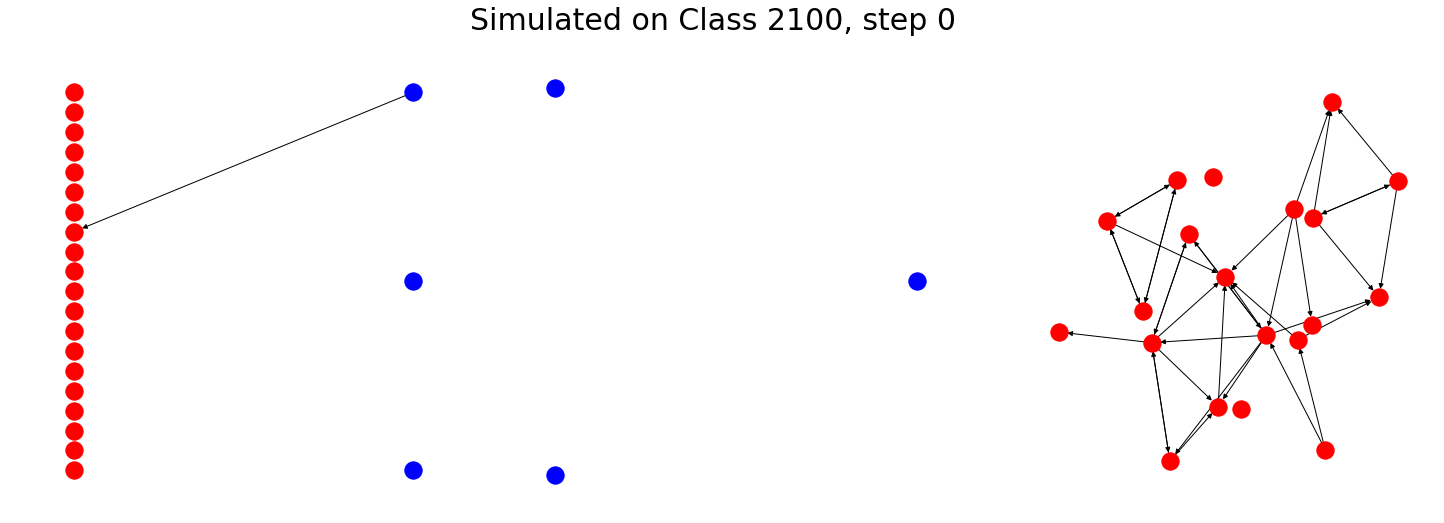

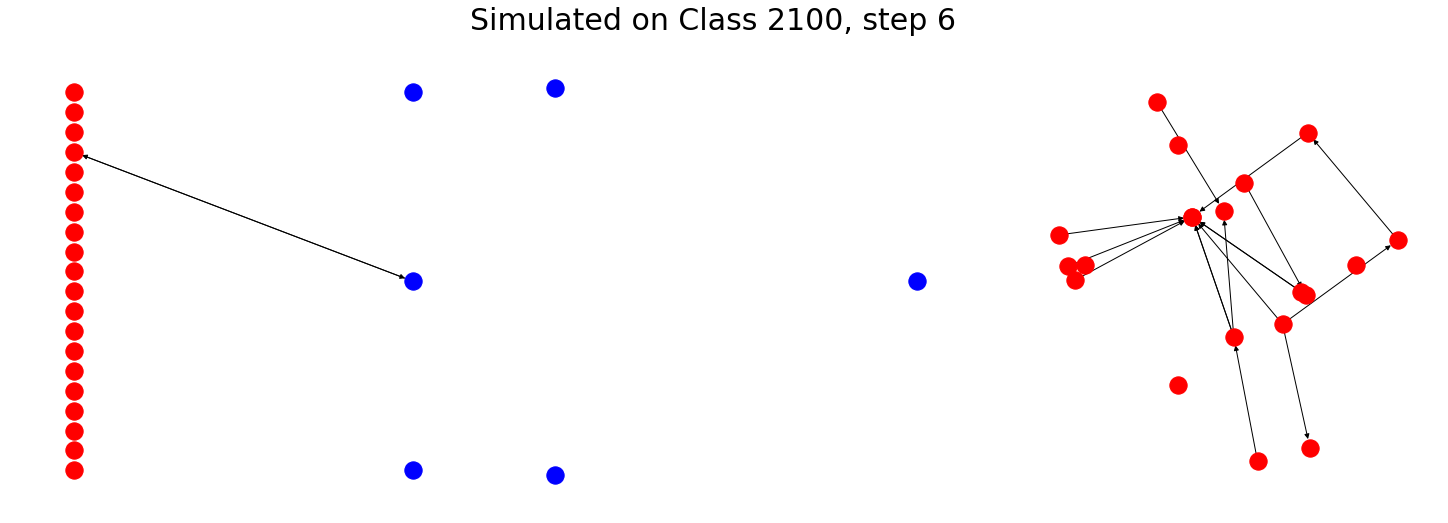

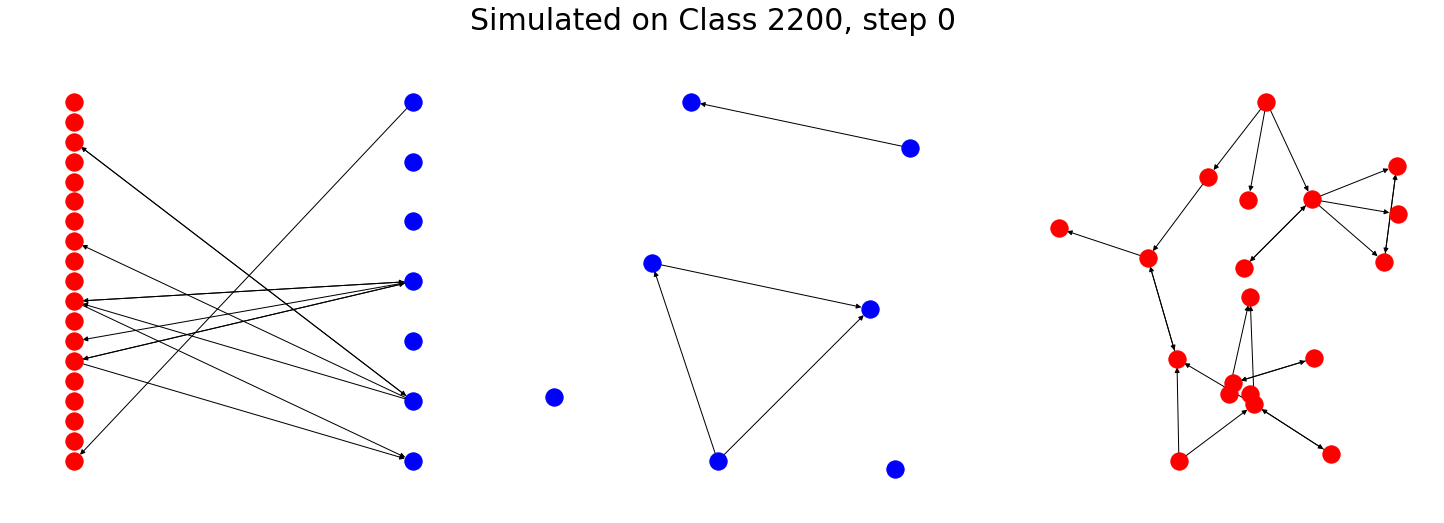

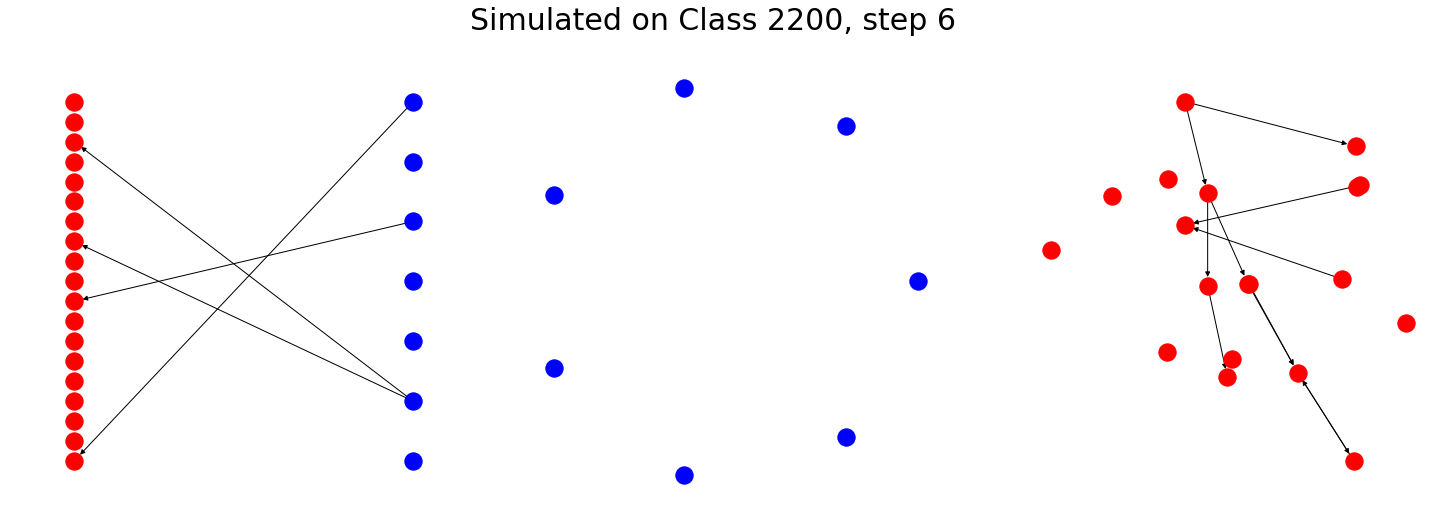

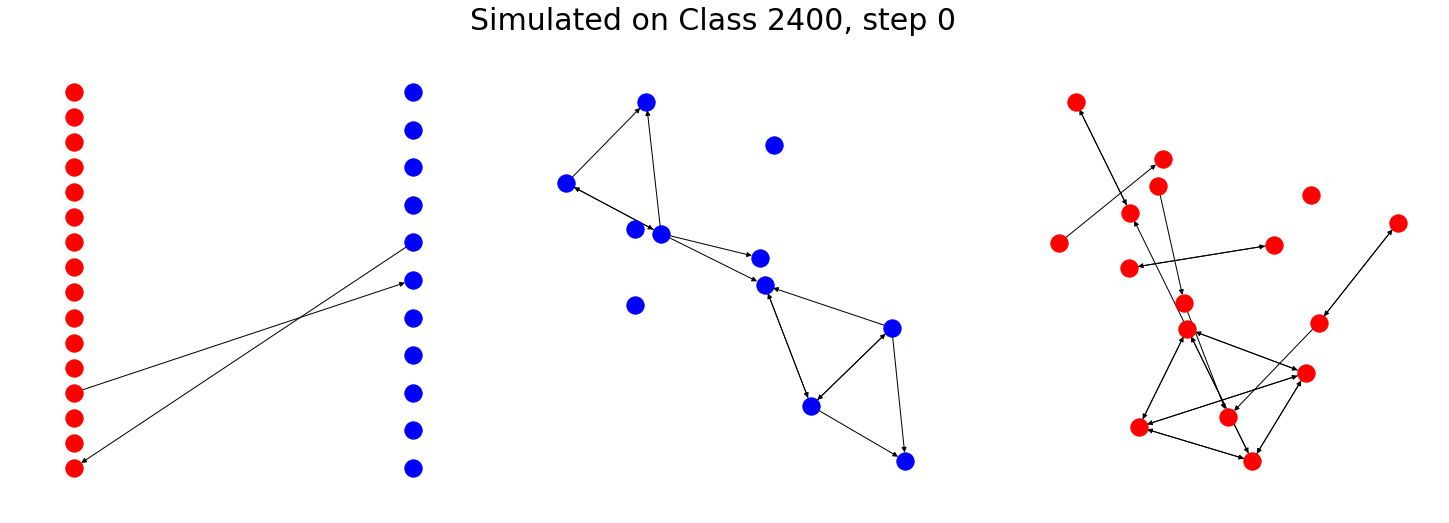

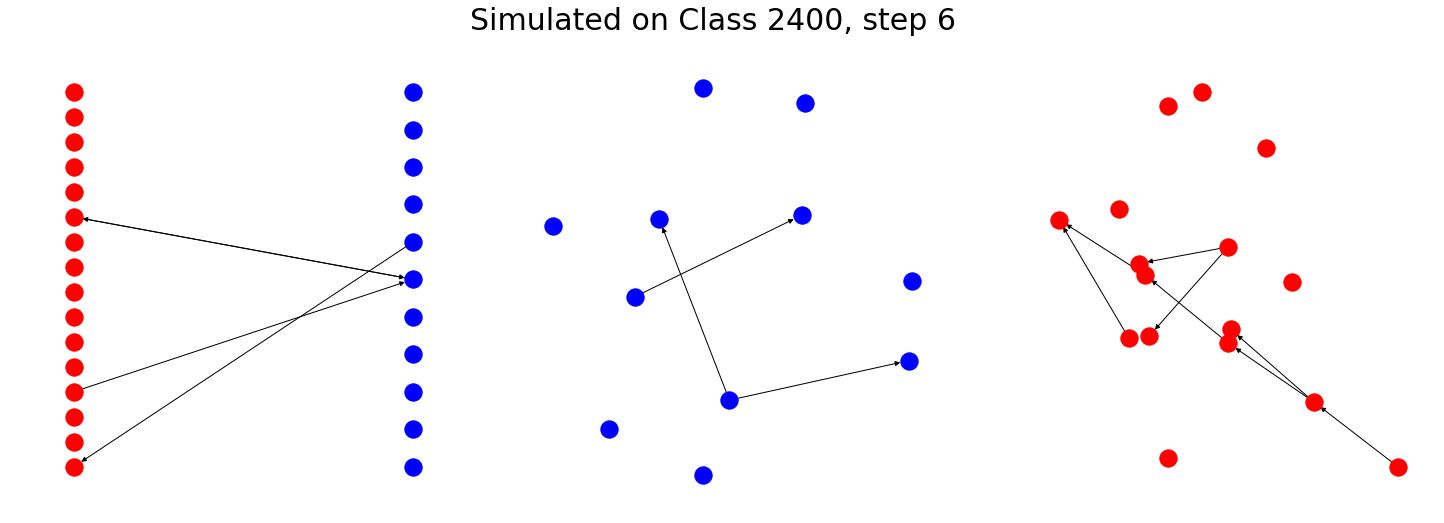

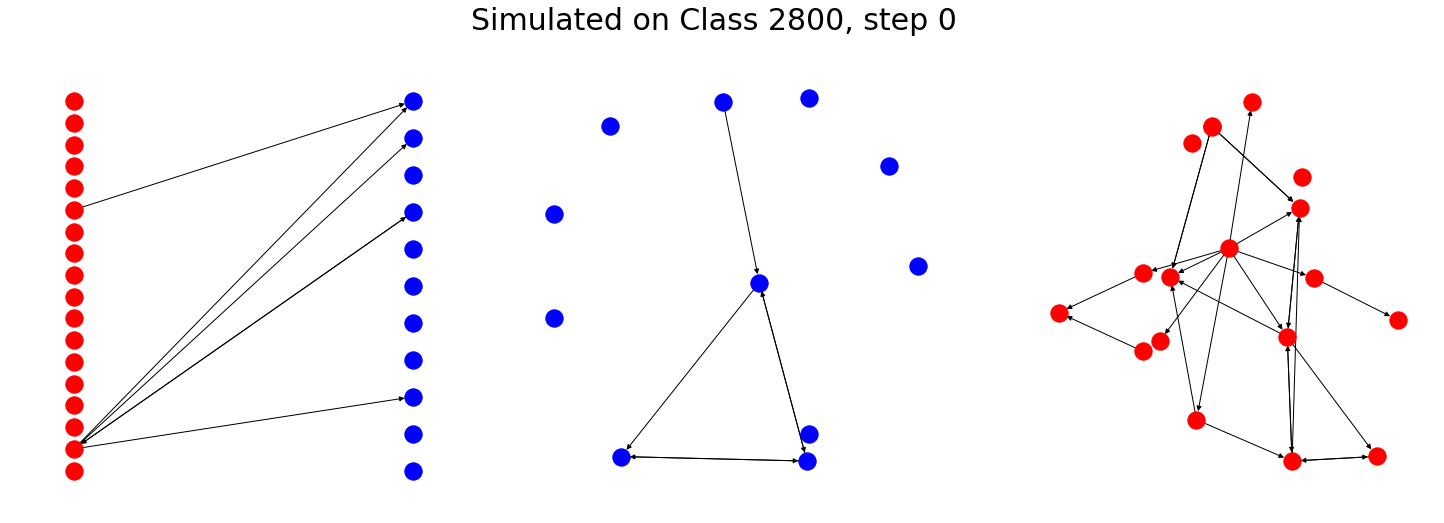

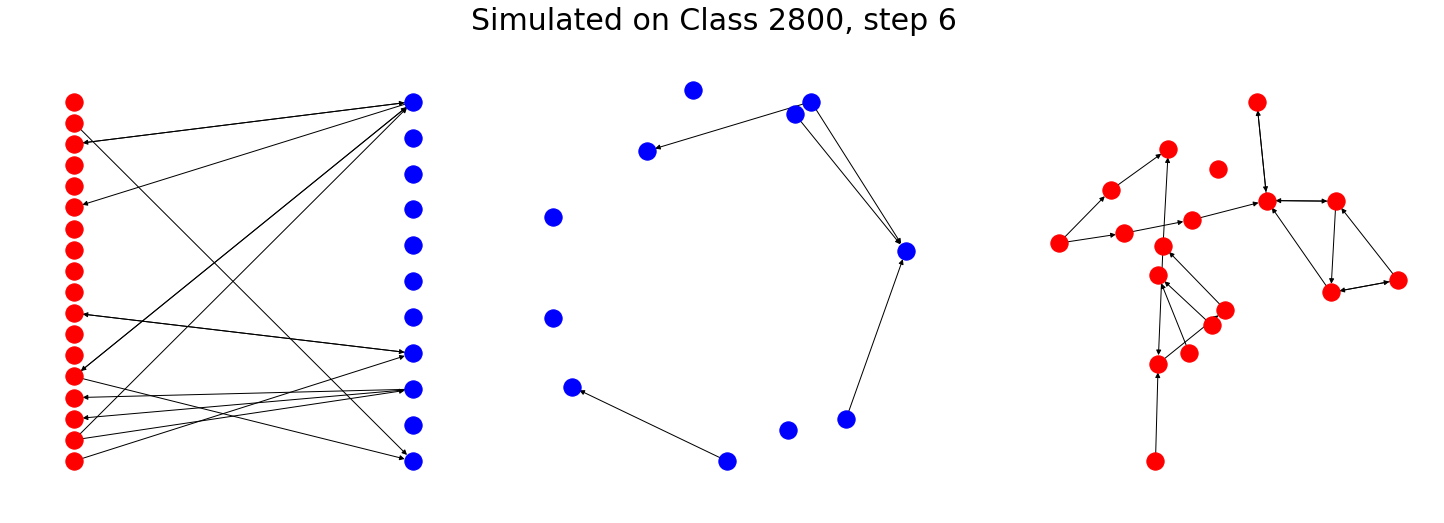

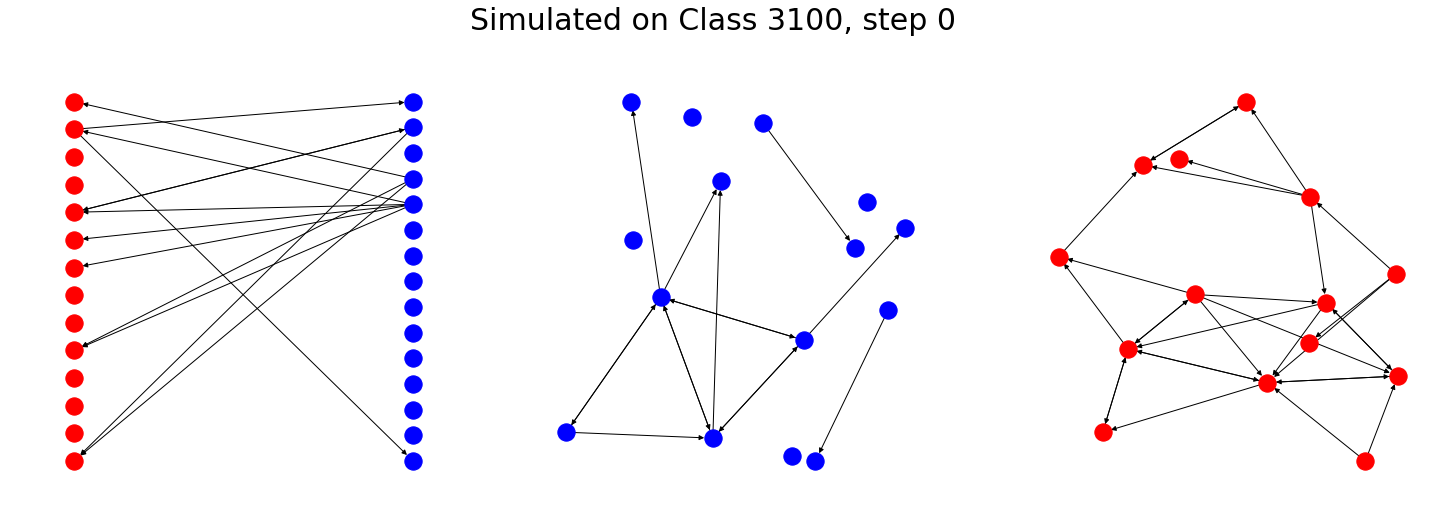

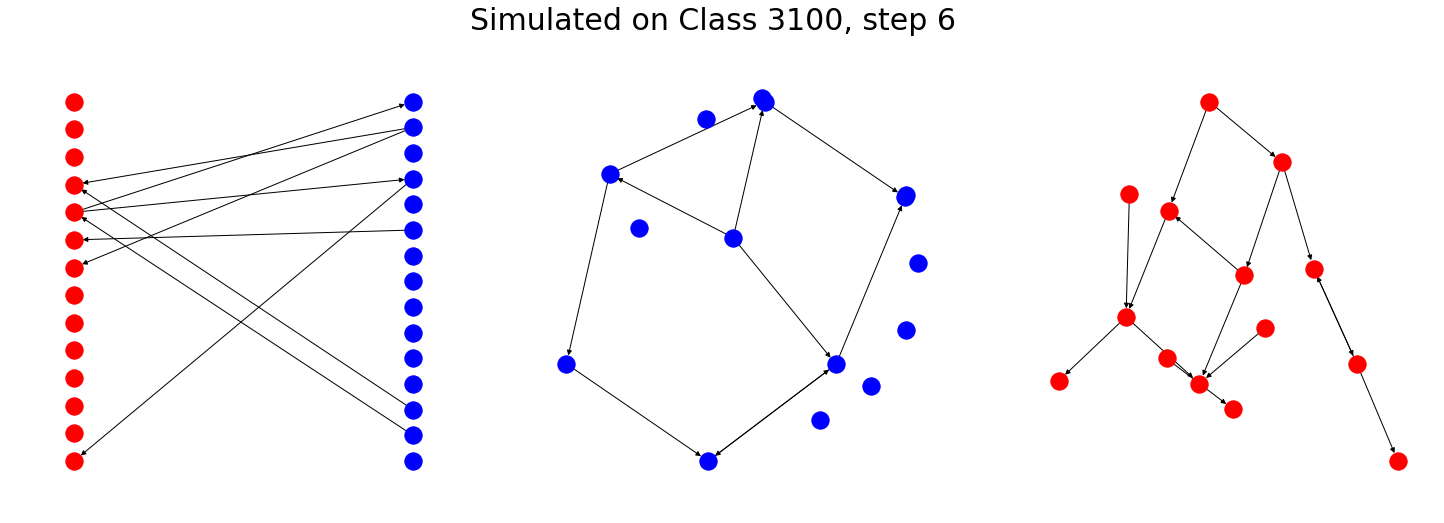

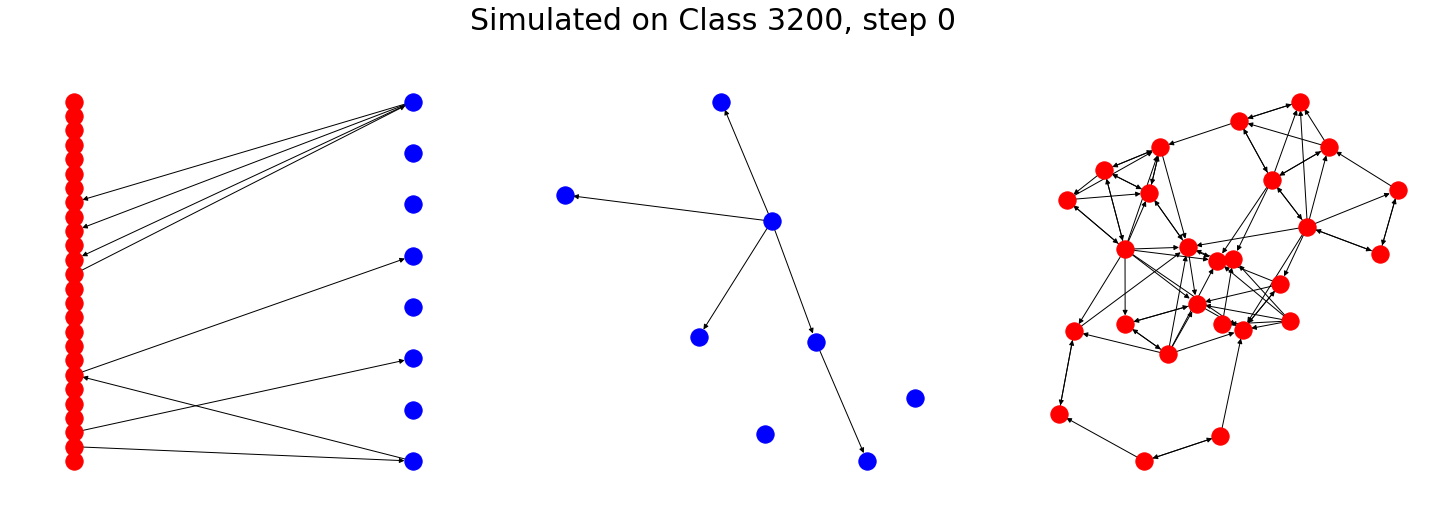

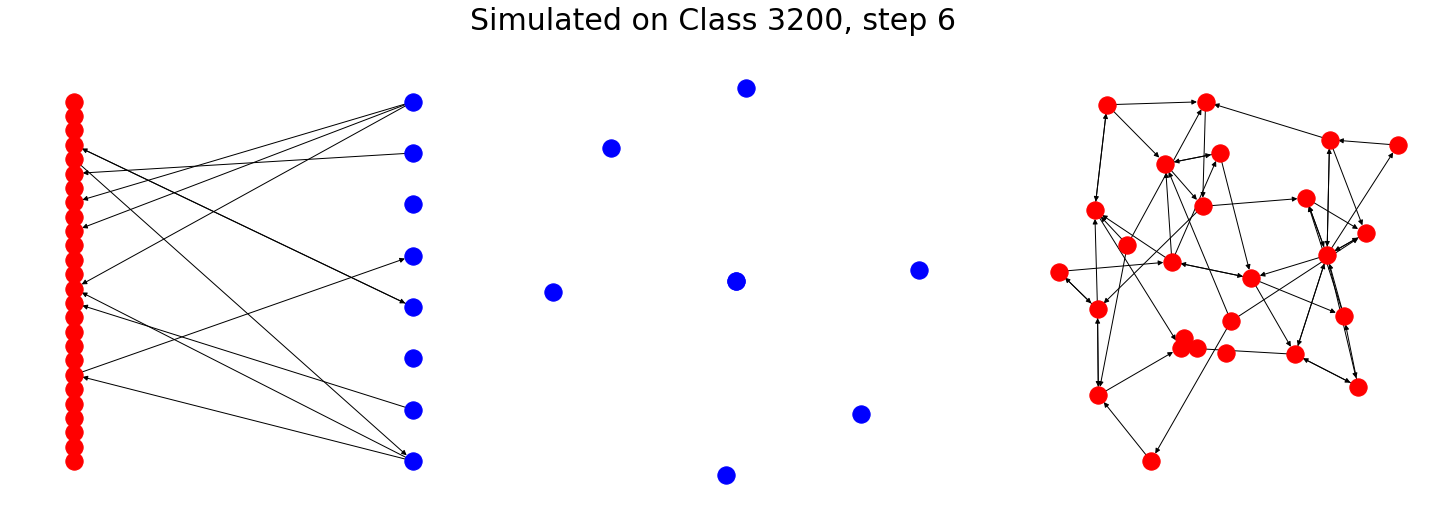

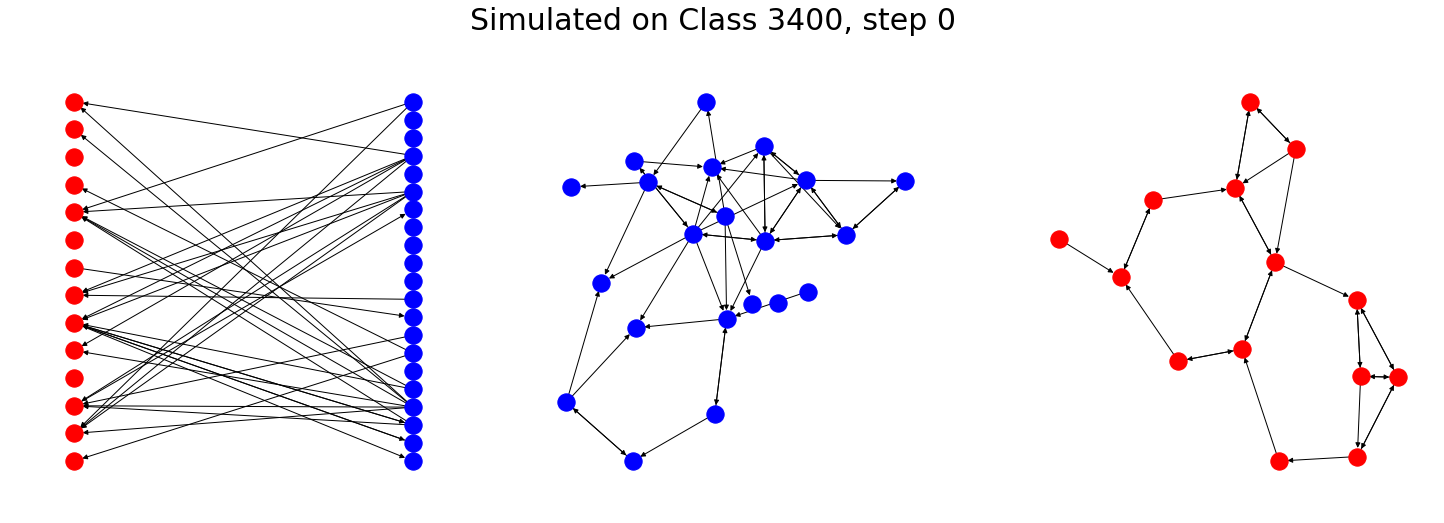

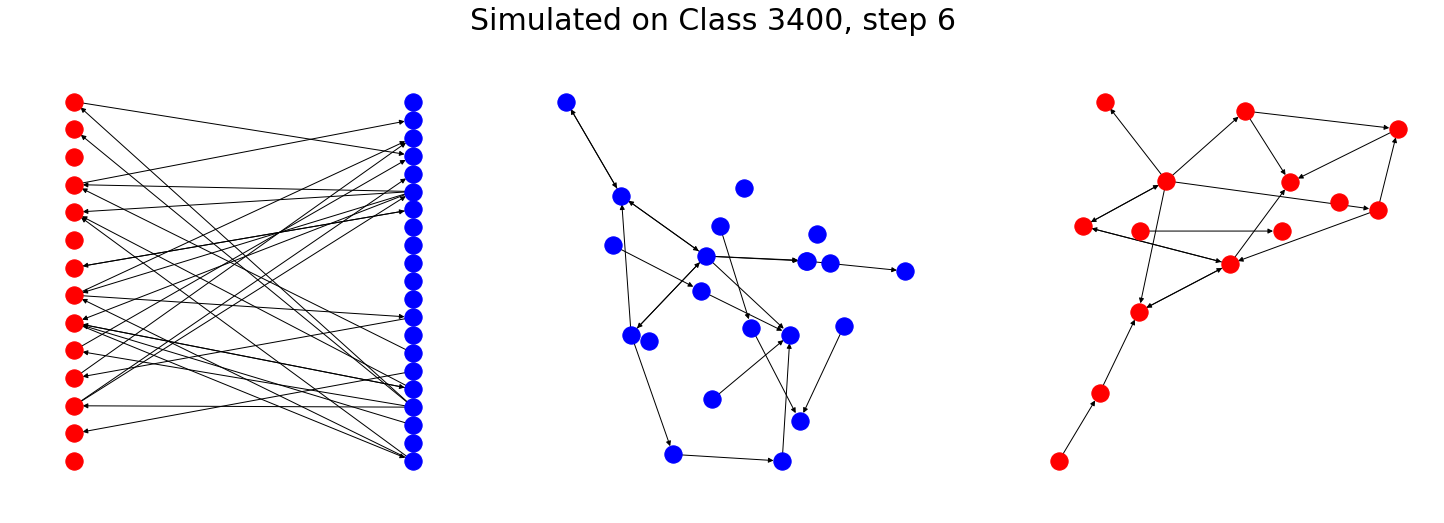

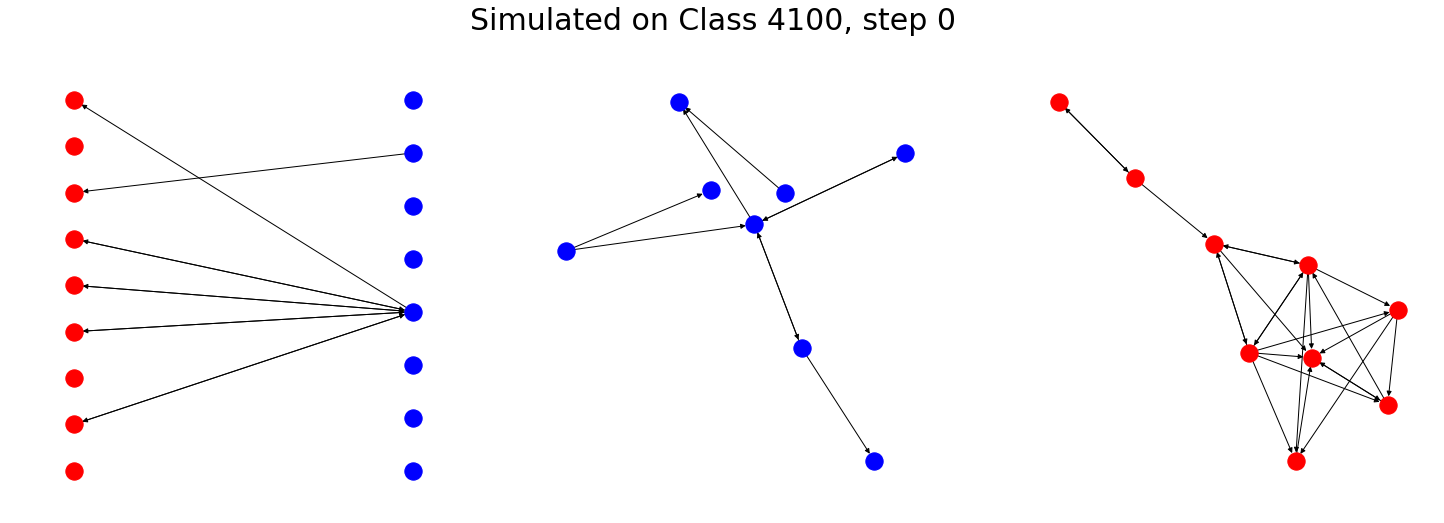

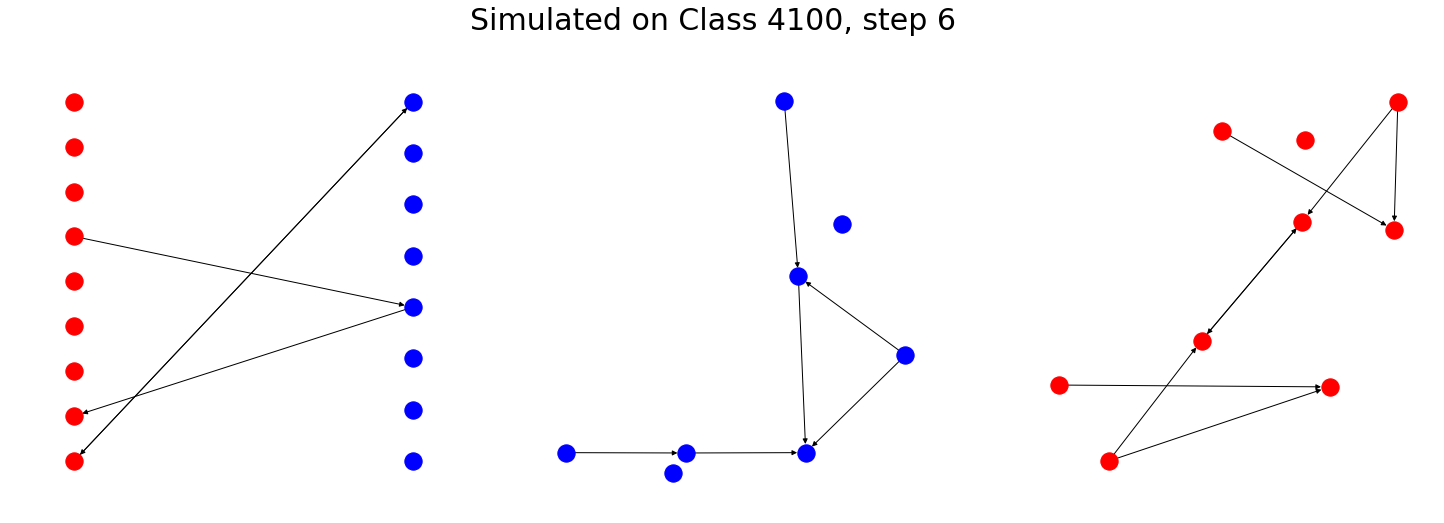

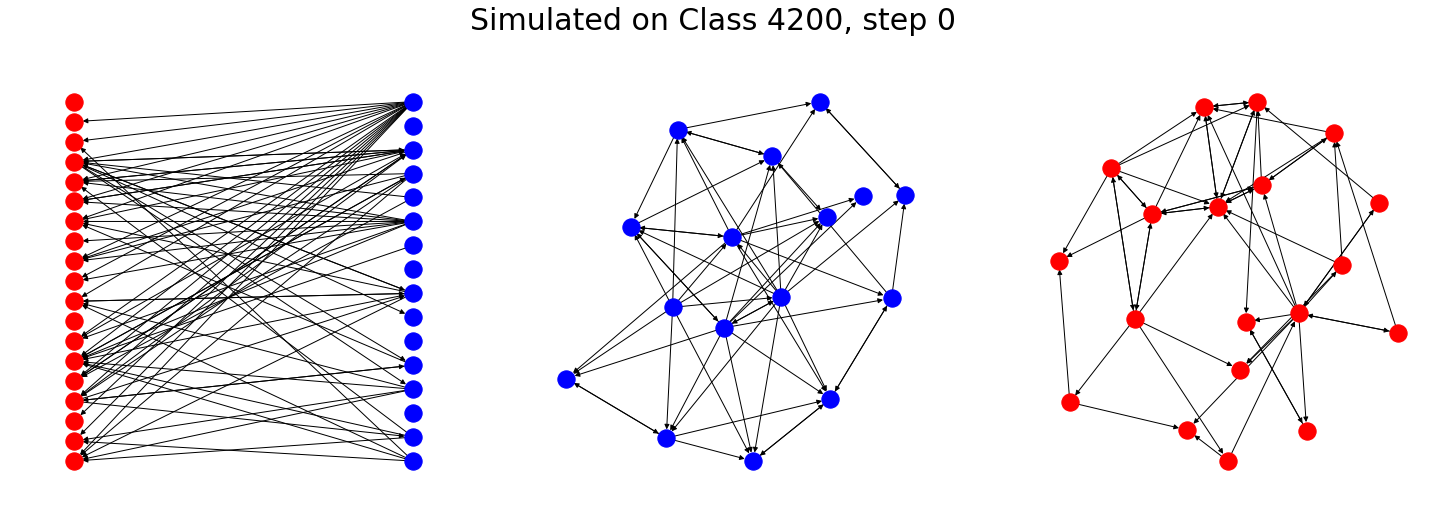

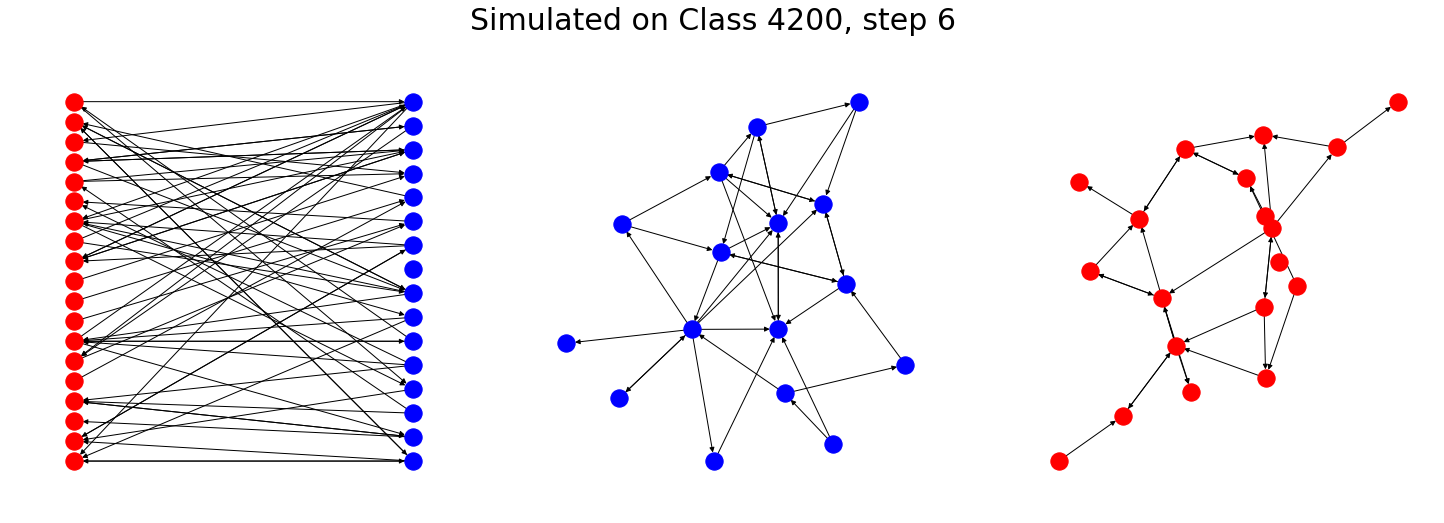

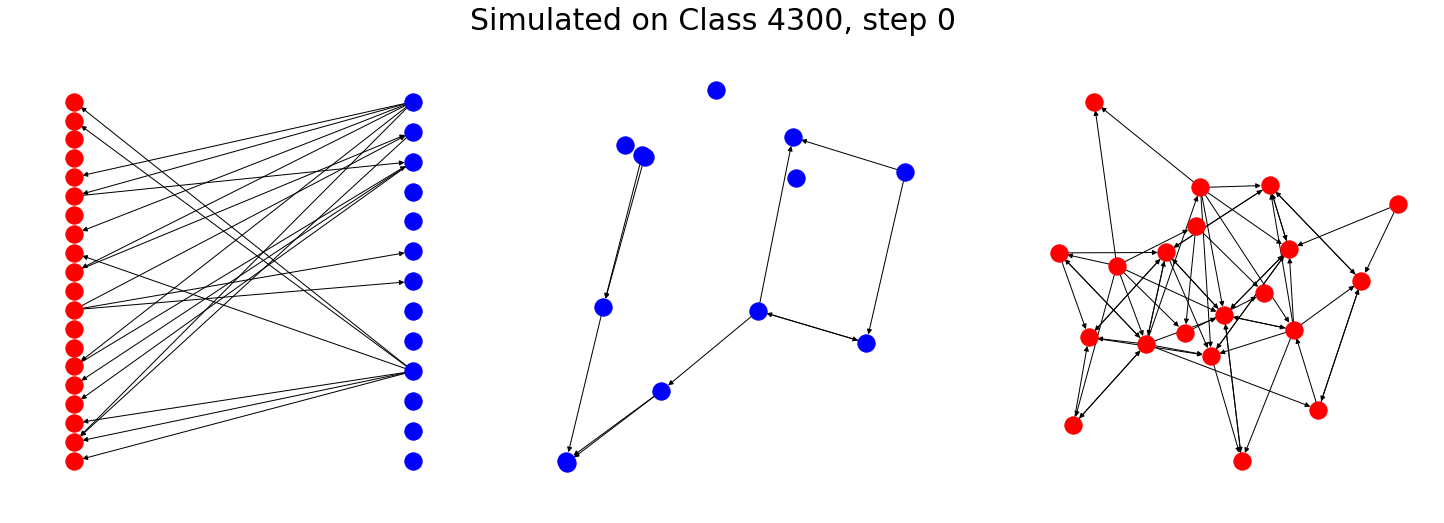

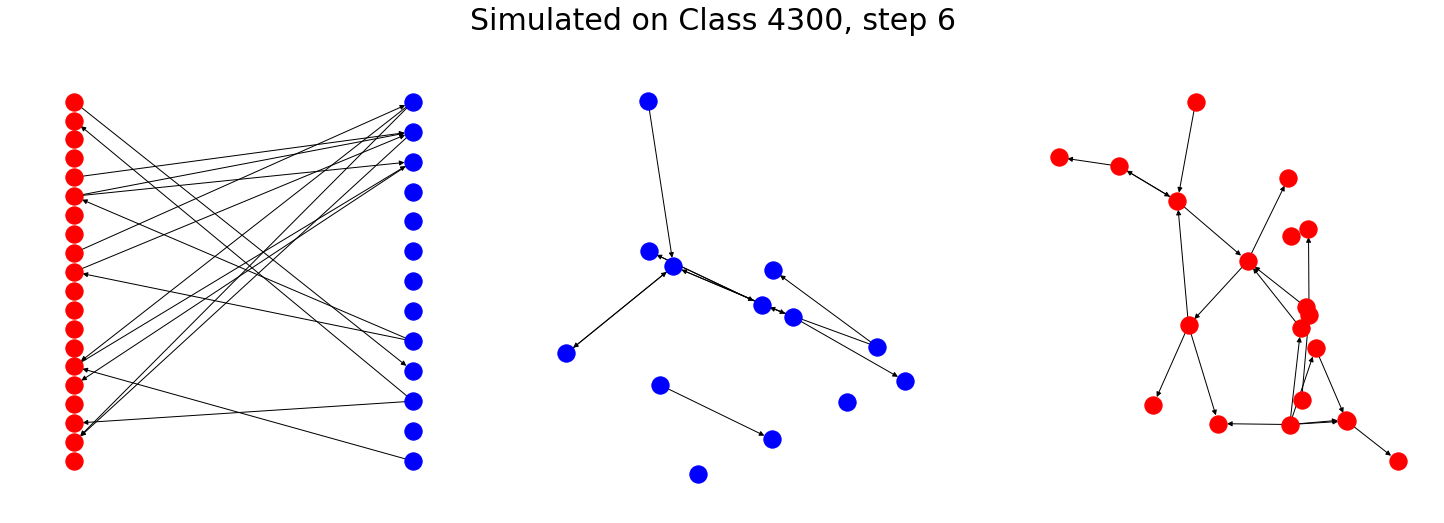

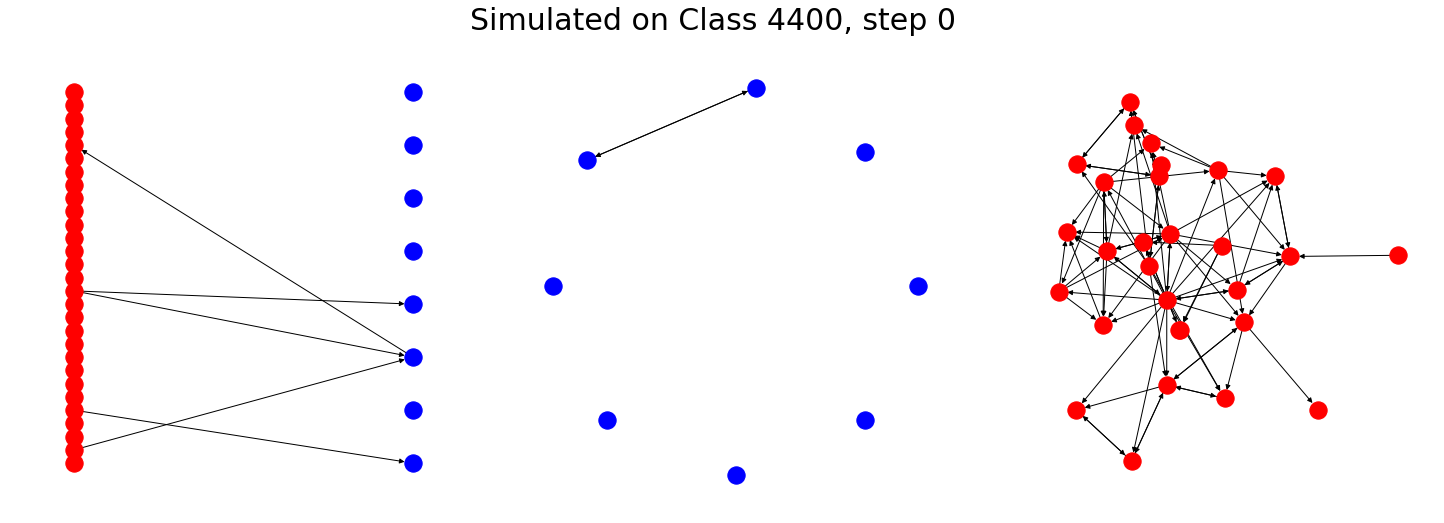

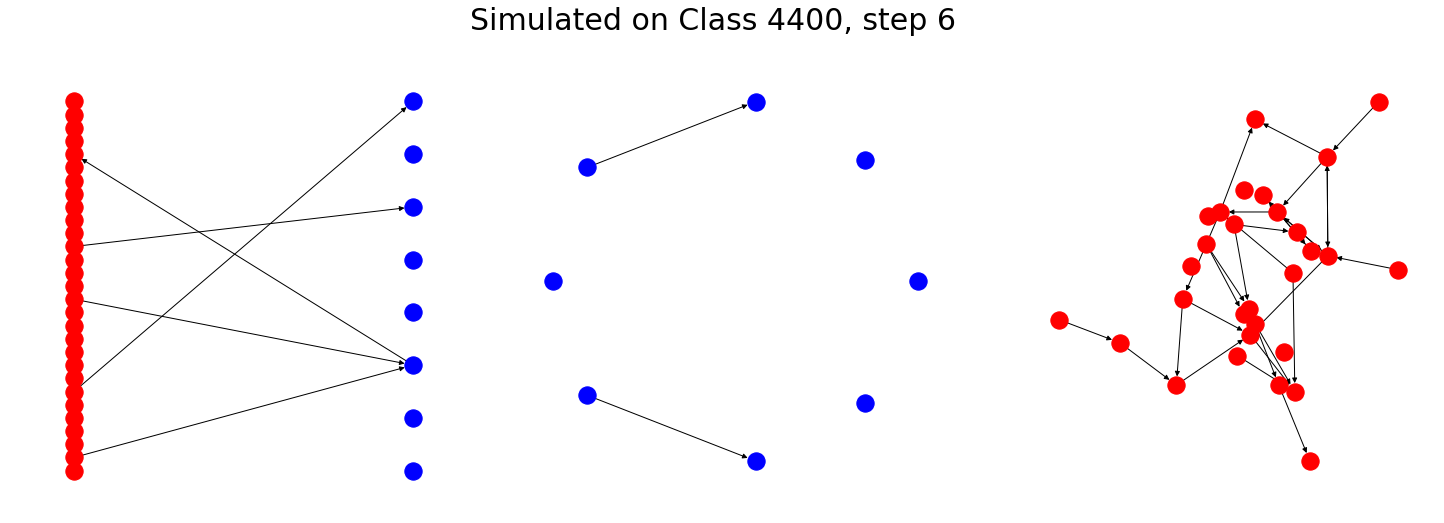

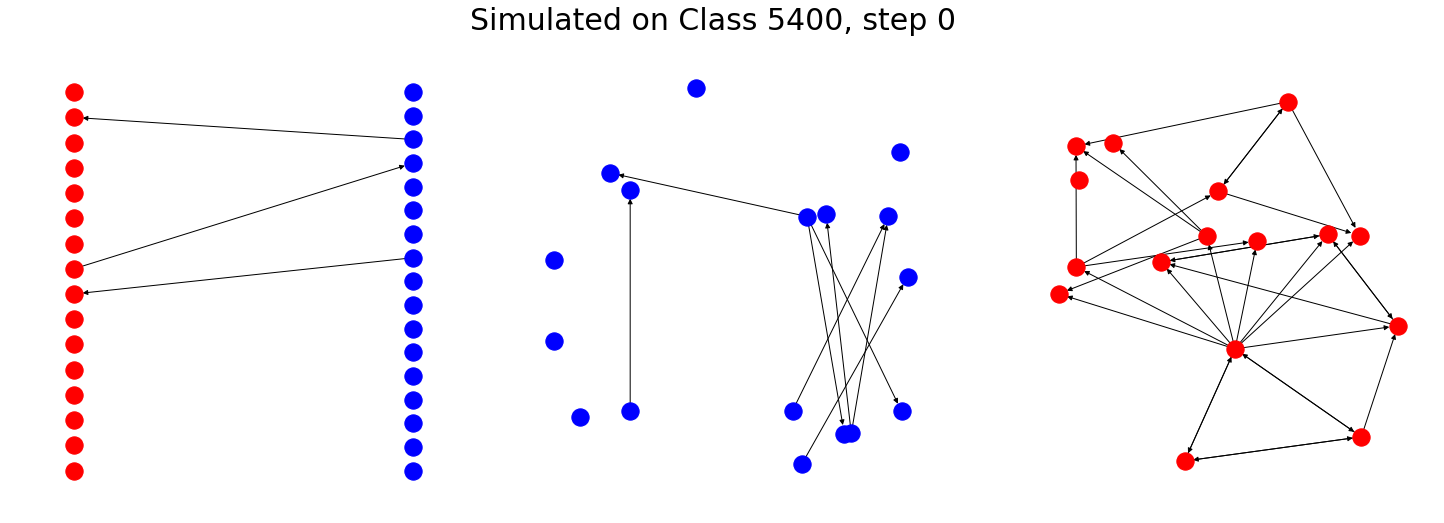

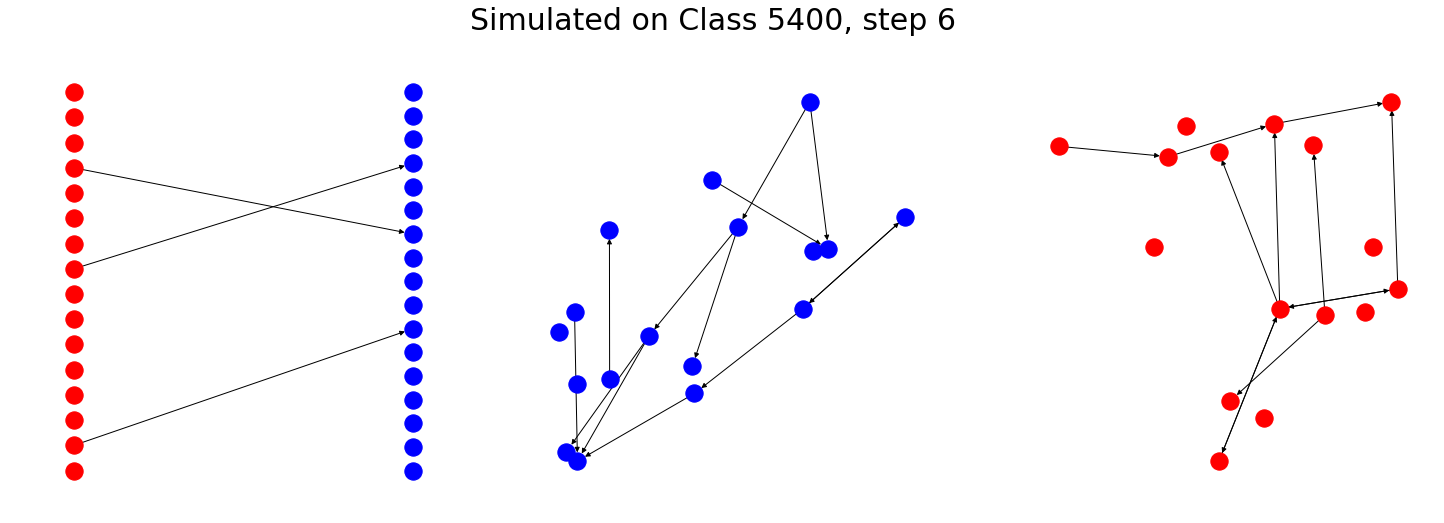

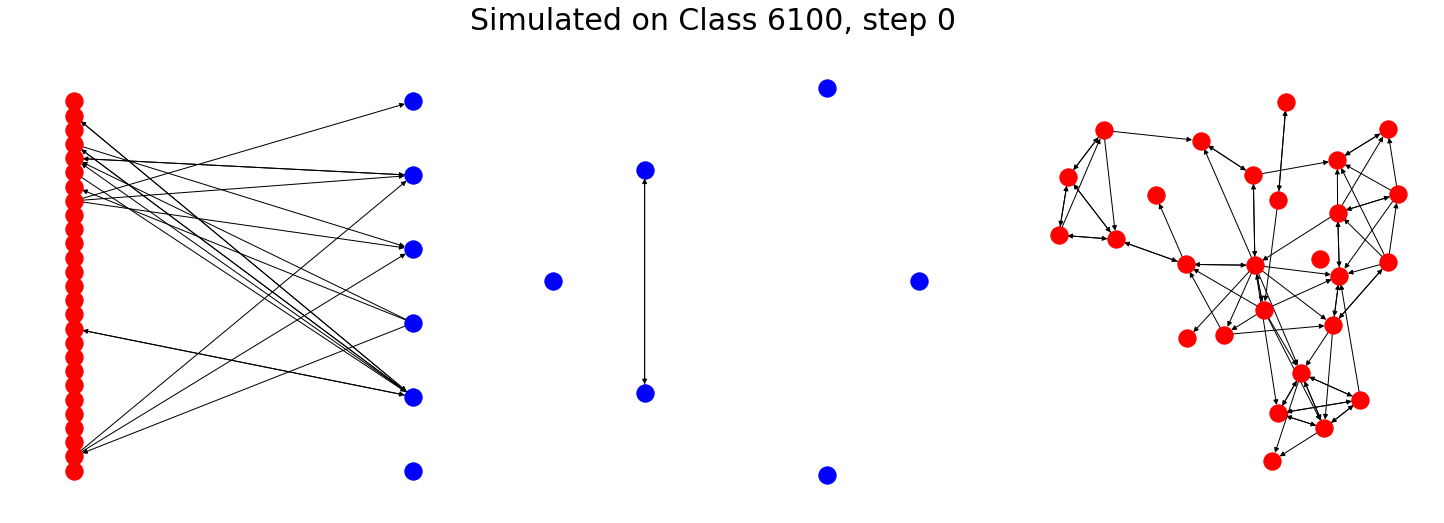

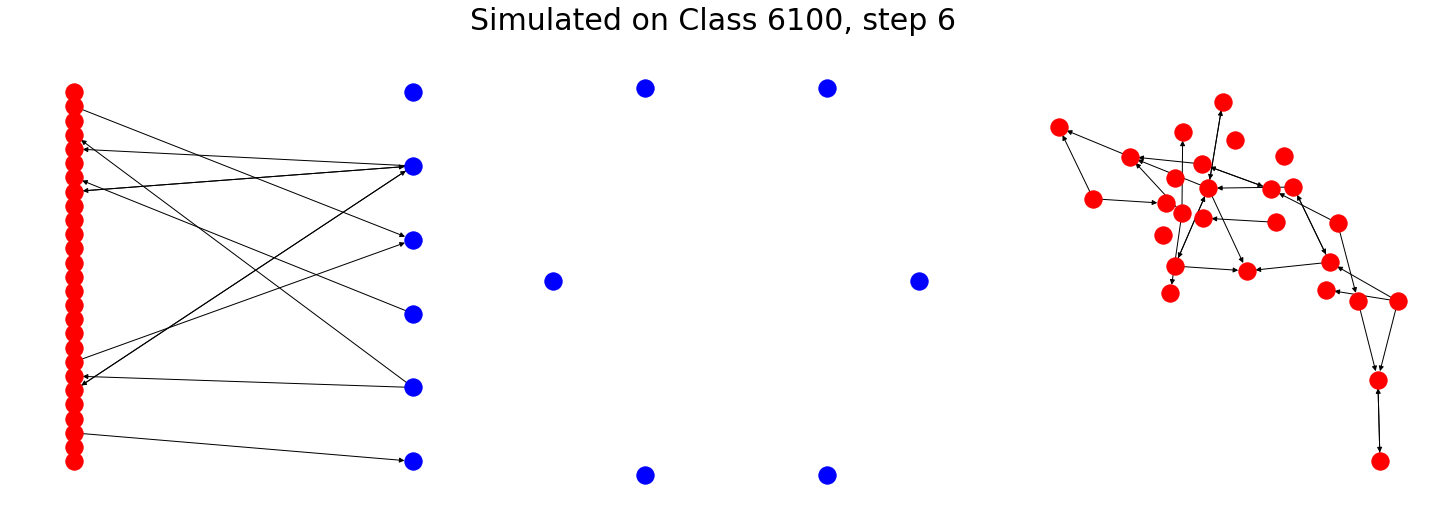

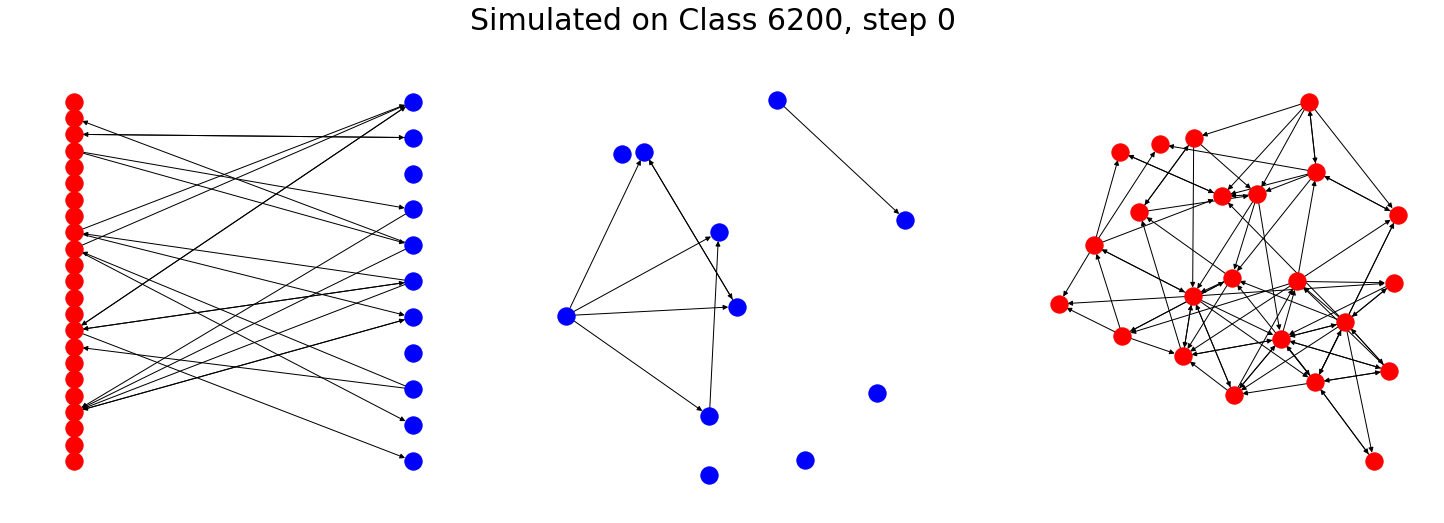

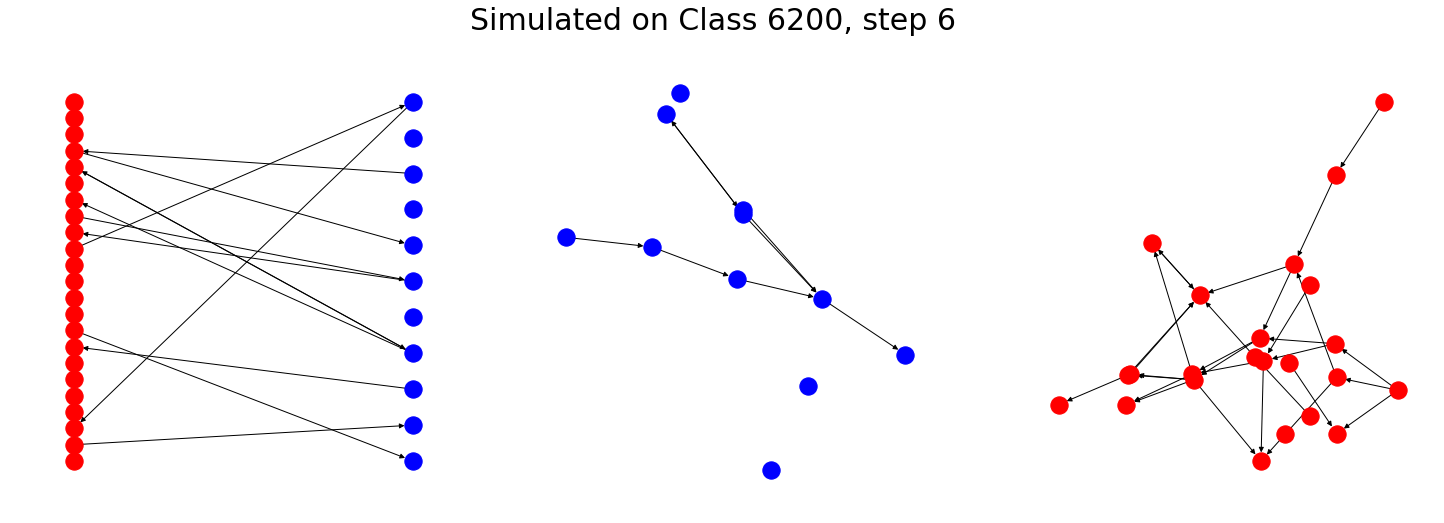

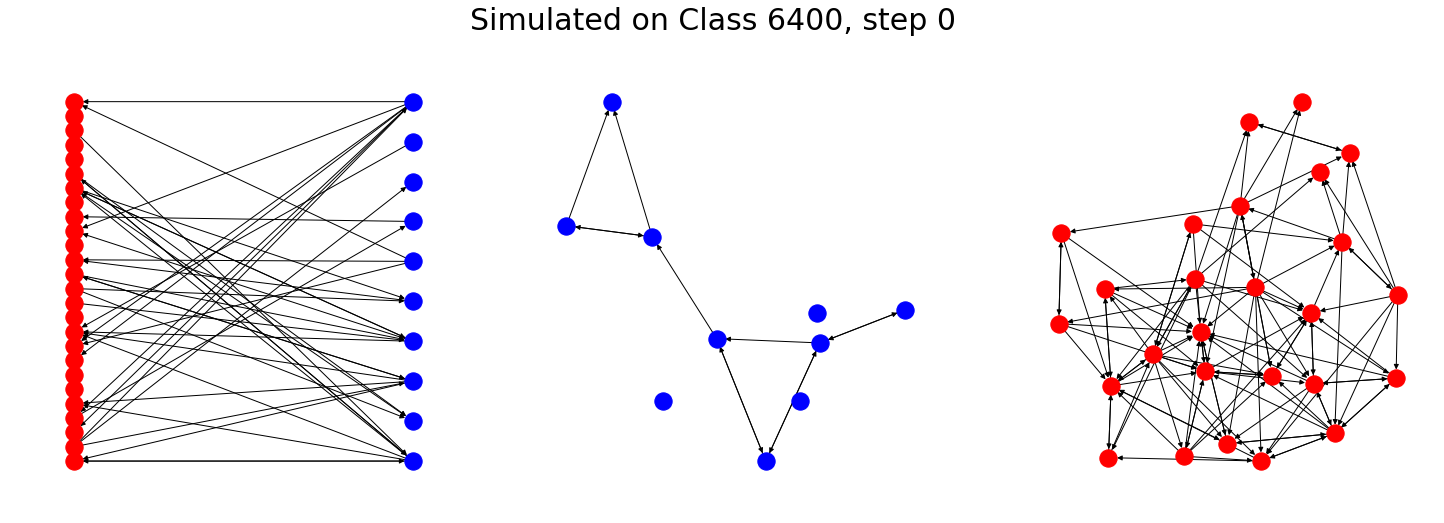

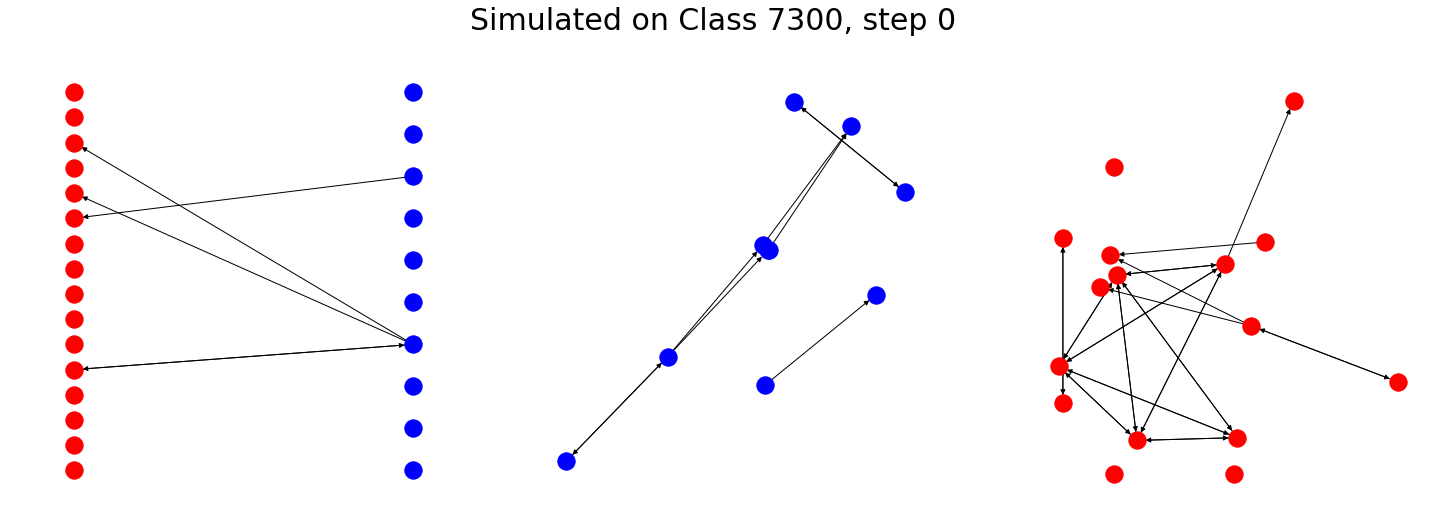

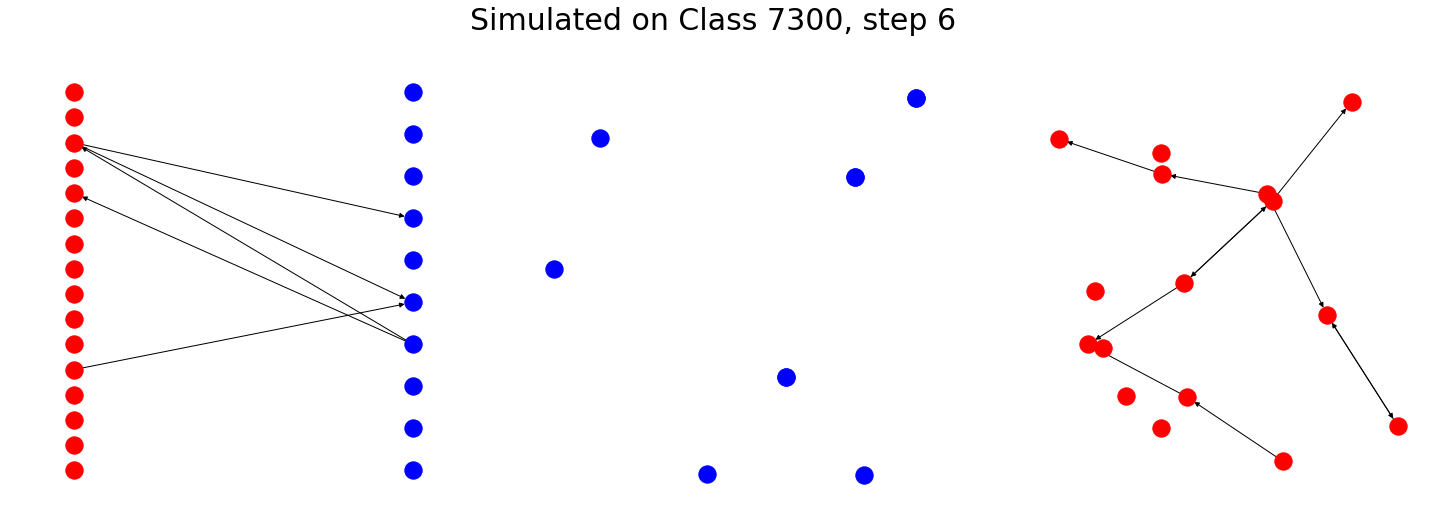

In [11]:
# Visualize all classes in step 0 and step #NUM_STEP
for class_id in class_ids:
    visualize(simulated_networks[class_id][0], class_id, 0)
    visualize(simulated_networks[class_id][NUM_STEP], class_id, NUM_STEP)